In [2]:
# Import libraries
import batch_data_processing as bdp
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

# Style
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'

# Change style to science plots
plt.style.use(['science','no-latex'])

C:\Users\ubillusj\Desktop\CMG_Ubillus\Rel_Perm_Generator.py:81: RuntimeWarning: invalid value encountered in power
  pc1 = pce_1*(((wat_sat - swi)/(1-swi))**(-1/0.464)-1)**(1/1.864) # Sand Capillary pressure (psi)
C:\Users\ubillusj\Desktop\CMG_Ubillus\Rel_Perm_Generator.py:82: RuntimeWarning: invalid value encountered in power
  pc2 = pce_2*(((wat_sat - swi)/(1-swi))**(-1/0.559)-1)**(1/2.266) # Shale Capillary pressure (psi)
C:\Users\ubillusj\Desktop\CMG_Ubillus\Rel_Perm_Generator.py:125: RuntimeWarning: invalid value encountered in power
  pcI = pce_1*(((swfh**-1/0.464)-1)**(1/1.864)-1)
C:\Users\ubillusj\Desktop\CMG_Ubillus\Rel_Perm_Generator.py:126: RuntimeWarning: invalid value encountered in power
  pcI2 = pce_2*(((swfh**-1/0.559)-1)**(1/2.266)-1)


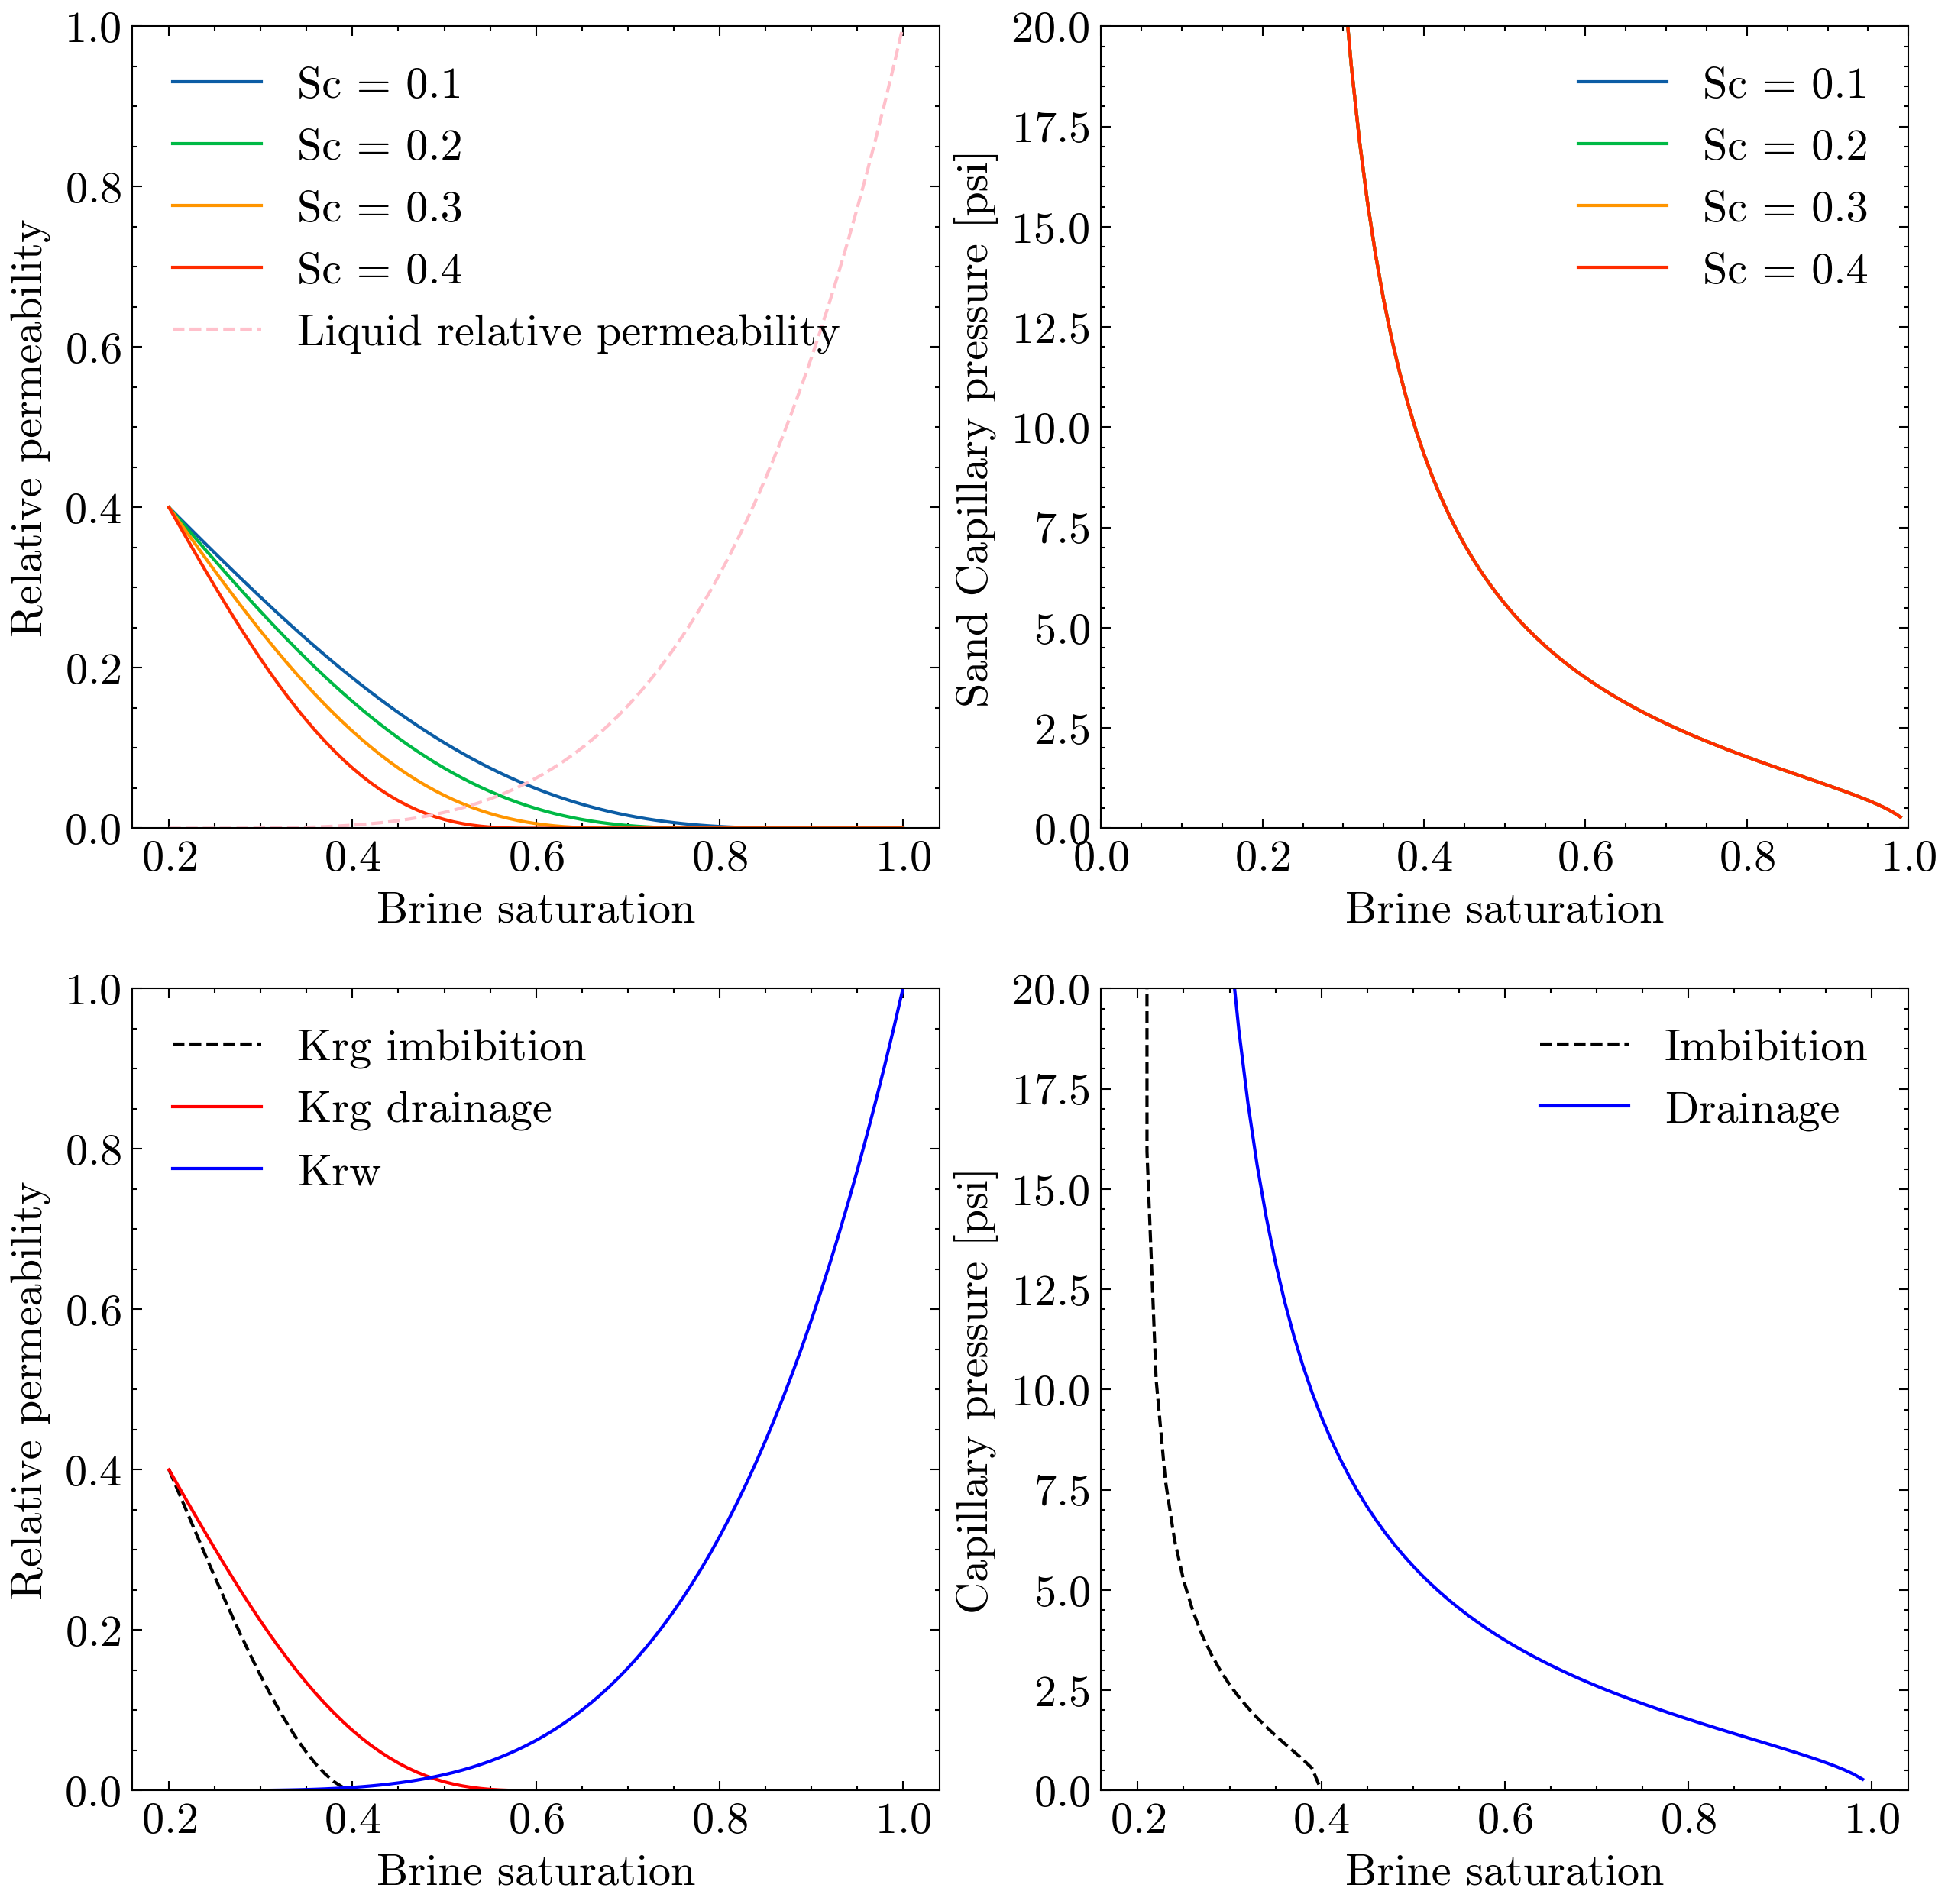

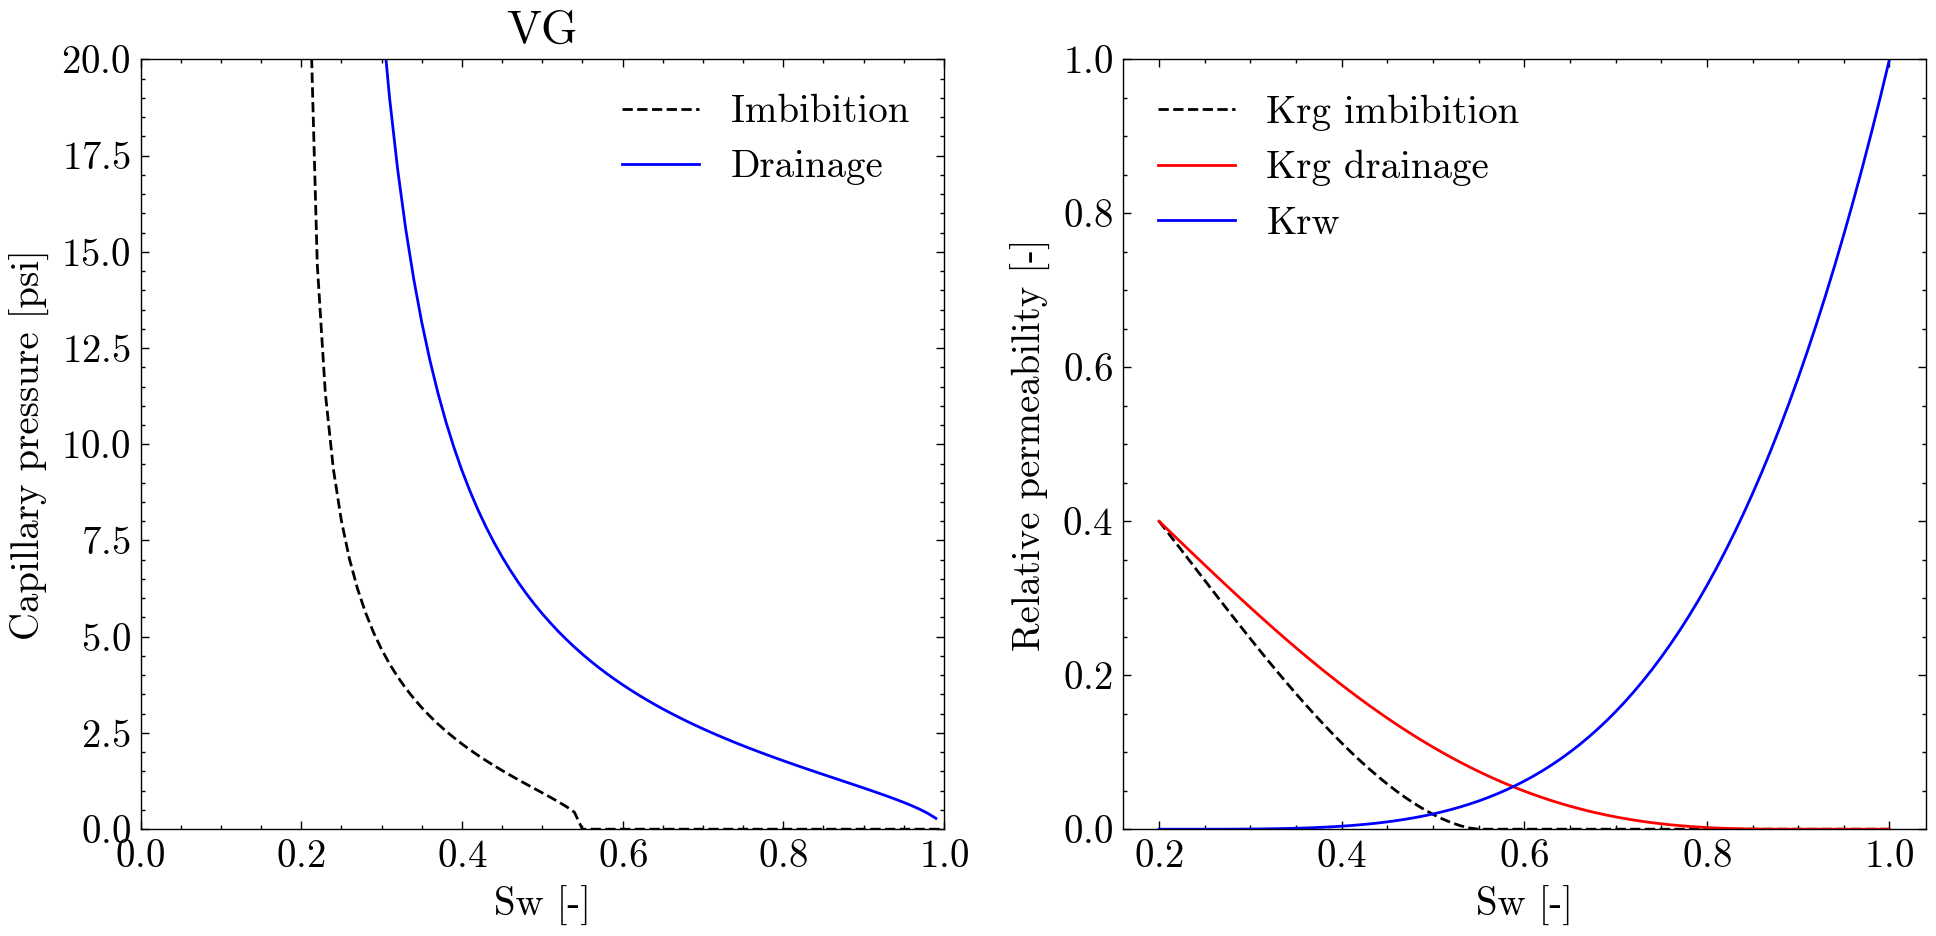

In [3]:
import Rel_Perm_Generator as rpg
path=None
rpg.rel_perm_batch(path,0.1,0.4,cap_p_model='VG',swi=0.2,pce_1=1.93,pce_2=2.14e3,kx_s=500,kx_sh=0.01,print_bool=False)


# Comparing Modified Brooks-Corey, Brooks-Corey and van Genuchten models for a critical saturation of 0.1

If planned this will be extended to 0.1< $S_{nt}$ > 0.4

## Geomodel and petrophysical parameters

In [6]:
# Read geological model and properties
# Define the path for the data files 
path = 'C:/Users/ubillusj/Downloads/results_nokrg/results_nokrg/'

# Read the data files using geobuilder function available in batch_data_processing.py
# The function returns a dictionary with the data for each simulation
rel_perm,x,z,shape = bdp.geo_builder(path,'S1/Het2D_nokrg Rel Perm Set Num 2018-Dec-01.gslib')
porosity,shape = bdp.list_to_array(path,'S1/Het2D_nokrg Porosity 2018-Dec-01.gslib')
perm, shape = bdp.list_to_array(path,'S1/Het2D_nokrg Permeability I 2018-Dec-01.gslib')
volume,shape = bdp.list_to_array(path,'S1/Het2D_nokrg Gross Block Volume 2018-Dec-01.gslib')

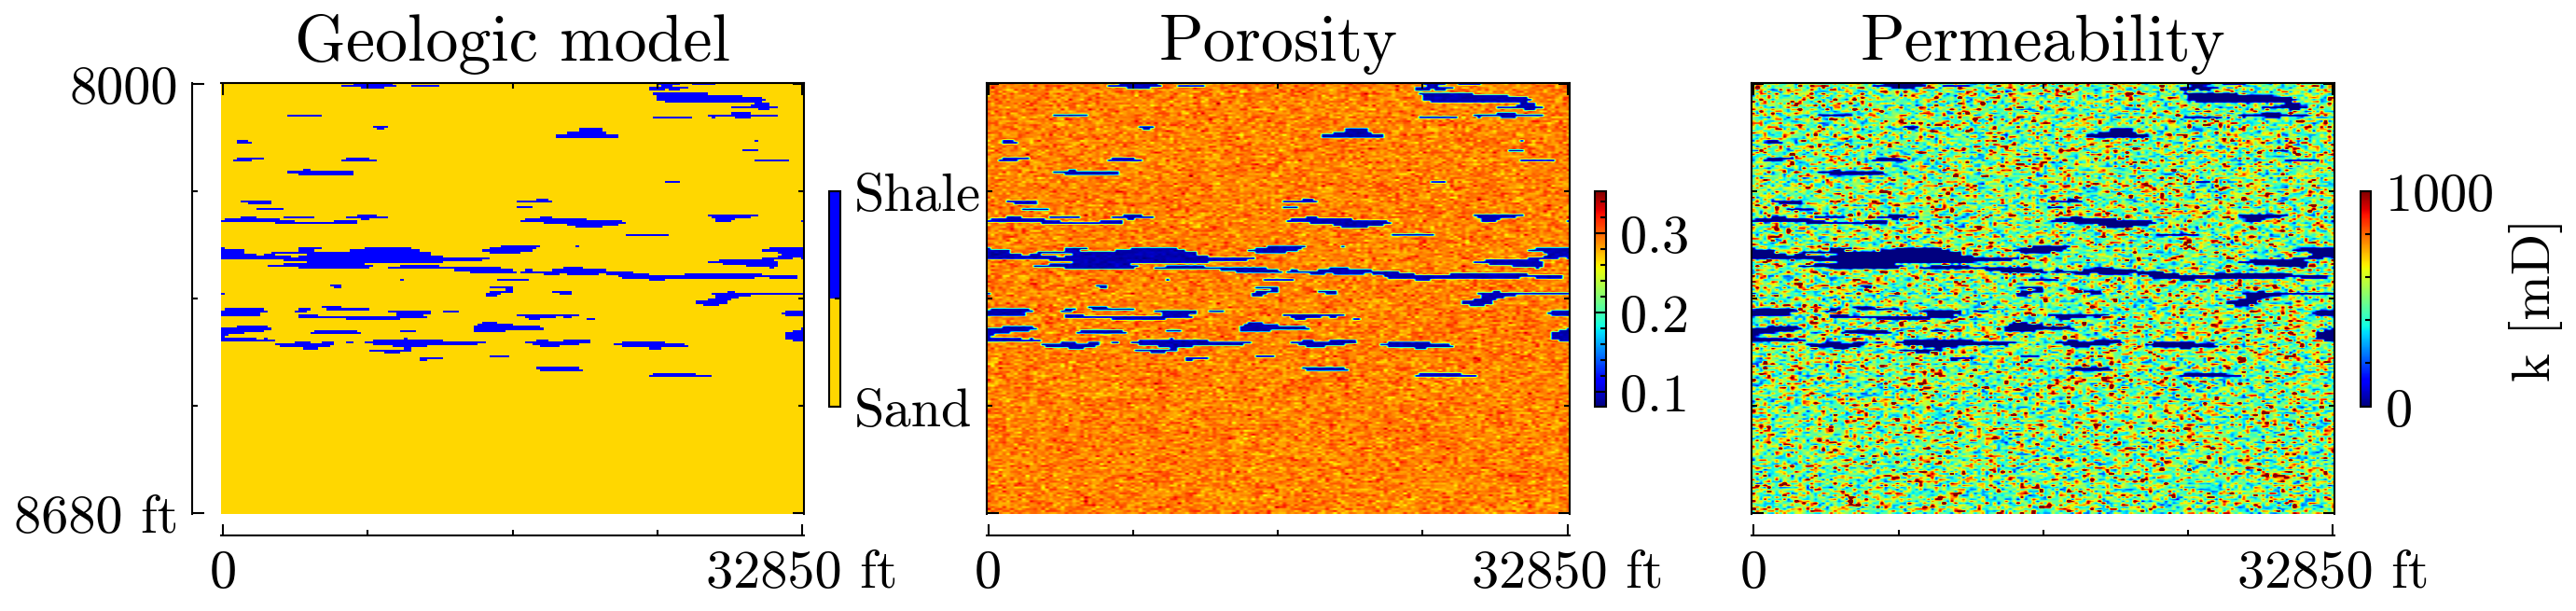

In [7]:
# Plot geological model and petrophysical properties
bdp.geo_properties(rel_perm,porosity,perm)

## Simulation results

In [8]:
path = 'C:/Users/ubillusj/Downloads/'
paths = ['Simulations_Cap_Pres/Simulations_Cap_Pres/MBC/Results/','Simulations_Cap_Pres/Simulations_Cap_Pres/BC/Results/','van_genuchten_sim/van_genuchten_sim/Results/']

# dictionaries that will store the different variable results for each simulation
mbc_gas = {} ; mbc_trp = {} ; mbc_sp = {}
bc_gas = {} ; bc_trp = {} ; bc_sp = {}
vg_gas = {} ; vg_trp = {} ; vg_sp ={}

size = 2 # defines the number of simulations run

for i in range(size):
    folder = 'S' + str(i+1)
    
    mbc_gas[folder] = bdp.mul_list_to_array(path + paths[0] + folder + '/','Het2D Gas Saturation.gslib',shape,size=8)
    mbc_trp[folder] = bdp.mul_list_to_array(path + paths[0] + folder+ '/','Het2D Sg _ Sgc _ Hysteresis Dynamic trapped gas saturation.gslib',shape,size=8)
    #mbc_p = bdp.mul_list_to_array(path + paths[0],'Het2D_real Pressure.gslib',shape,size=2)
    mbc_sp[folder] = bdp.special_table(path + paths[0] + folder+ '/','special.xlsx')
    
    bc_gas[folder] = bdp.mul_list_to_array(path + paths[1] + folder+ '/','Het2D Gas Saturation.gslib',shape,size=8)
    bc_trp[folder] = bdp.mul_list_to_array(path + paths[1] + folder+ '/','Het2D Sg _ Sgc _ Hysteresis Dynamic trapped gas saturation.gslib',shape,size=8)
    #mbc_p = bdp.mul_list_to_array(path + paths[0],'Het2D_real Pressure.gslib',shape,size=2)
    bc_sp[folder] = bdp.special_table(path + paths[1] + folder+ '/','special.xlsx')
    
    vg_gas[folder] = bdp.mul_list_to_array(path + paths[2] + folder+ '/','Het2D Gas Saturation.gslib',shape,size=8)
    vg_trp[folder] = bdp.mul_list_to_array(path + paths[2] + folder+ '/','Het2D Sg _ Sgc _ Hysteresis Dynamic trapped gas saturation.gslib',shape,size=8)
    #mbc_p = bdp.mul_list_to_array(path + paths[0],'Het2D_real Pressure.gslib',shape,size=2)
    vg_sp[folder] = bdp.special_table(path + paths[2] + folder+ '/','special.xlsx')
    

# New analysis for multiple capillary pressure models

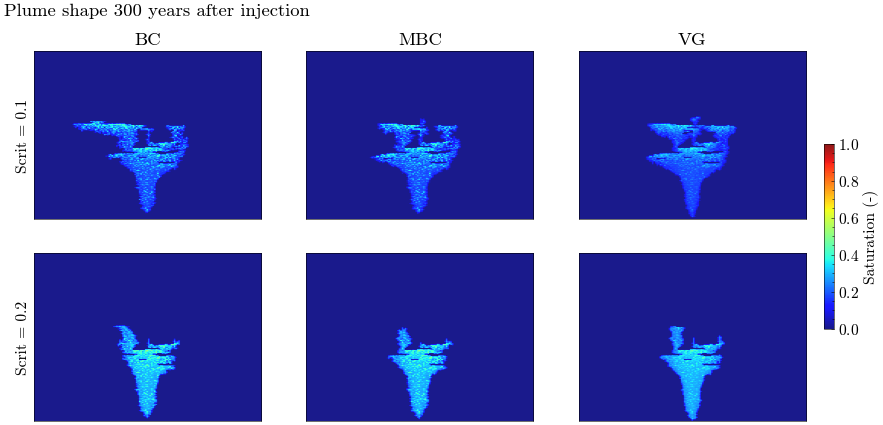

In [43]:
fig, axs = plt.subplots(2,3,figsize=(15,6),dpi=80,sharex=True,sharey=True)

im = axs[0,0].imshow(bc_gas['S1'][:,:,-1],cmap='jet',vmin=0.0,vmax=1,aspect='auto',alpha=0.9)
axs[0,0].set_title('BC')
axs[0,0].set_ylabel('Scrit = 0.1')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

axs[1,0].imshow(bc_gas['S2'][:,:,-1],cmap='jet',vmin=0.0,vmax=1,aspect='auto',alpha=0.9)
axs[1,0].set_ylabel('Scrit = 0.2')

axs[0,1].imshow(mbc_gas['S1'][:,:,-1],cmap='jet',vmin=0.0,vmax=1,aspect='auto',alpha=0.9)
axs[0,1].set_title('MBC')

axs[1,1].imshow(mbc_gas['S2'][:,:,-1],cmap='jet',vmin=0.0,vmax=1,aspect='auto',alpha=0.9)

axs[0,2].imshow(vg_gas['S1'][:,:,-1],cmap='jet',vmin=0.0,vmax=1,aspect='auto',alpha=0.9)
axs[0,2].set_title('VG')
axs[1,2].imshow(vg_gas['S2'][:,:,-1],cmap='jet',vmin=0.0,vmax=1,aspect='auto',alpha=0.9)


fig.suptitle('Plume shape 300 years after injection',ha='left',x=0.1)
fig.colorbar(im, ax=axs.ravel().tolist(), orientation = 'vertical',shrink=0.5,pad=0.02,ticks=[0,0.2,0.4,0.6,0.8,1],label='Saturation (-)')
plt.show()

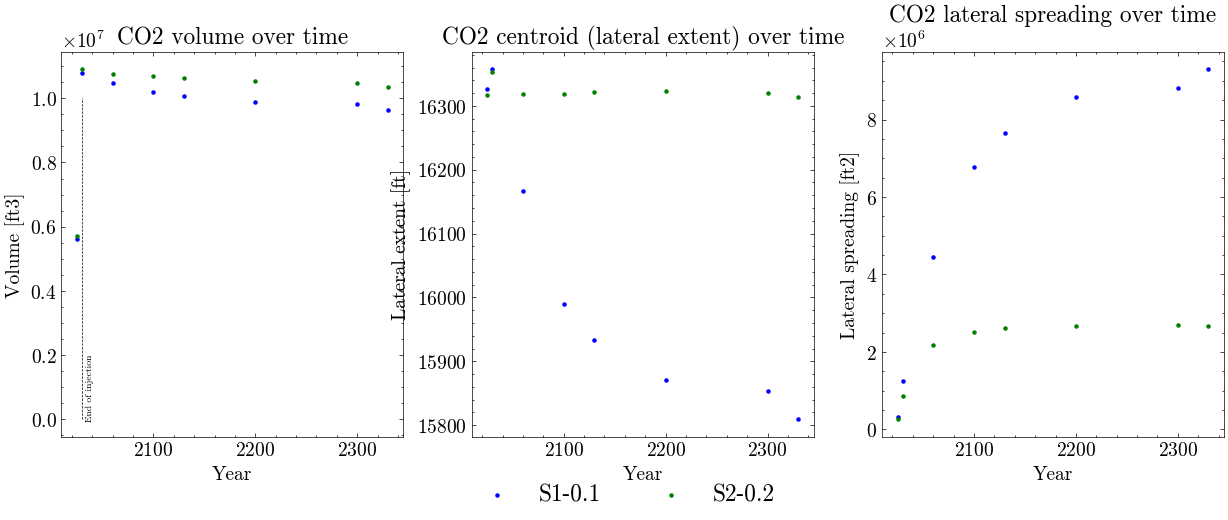

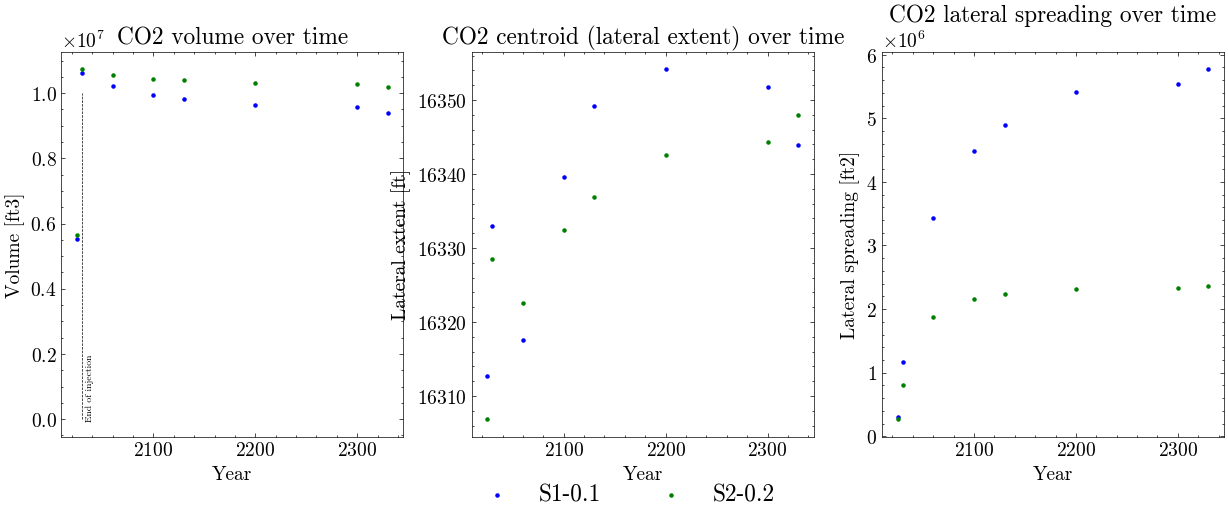

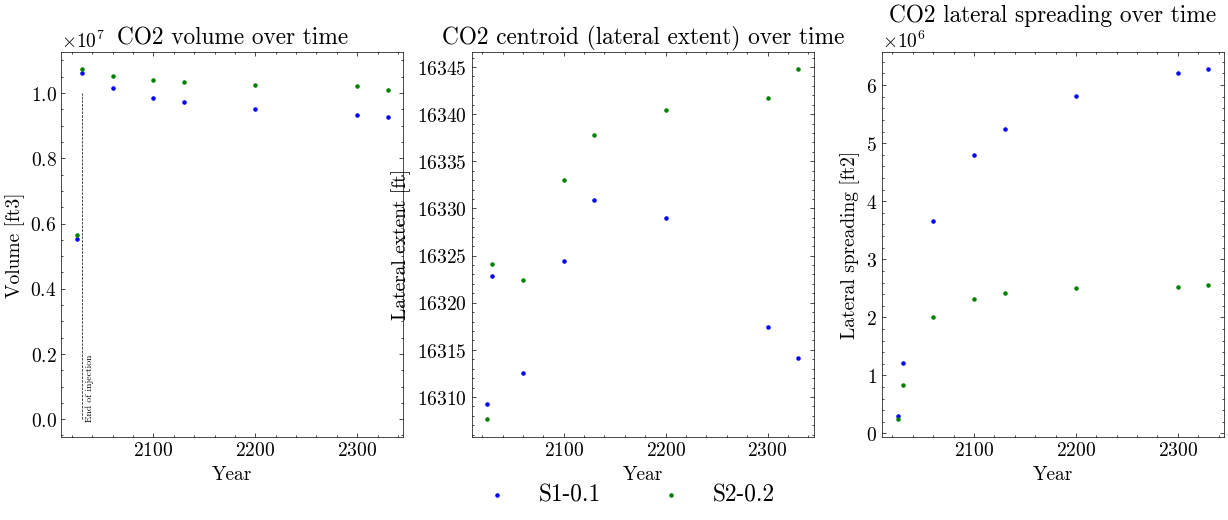

In [24]:
colors = ['blue','green','red','orange']
scrit= np.round(np.arange(0.1,0.3,0.1),2)
dates = [2025,2030,2060,2100,2130,2200,2300,2330]
mts_bc = bdp.batch_plot_moments(bc_gas,porosity,volume,x,z,dates,scrit=scrit,cl=colors)
mts_mbc = bdp.batch_plot_moments(mbc_gas,porosity,volume,x,z,dates,scrit=scrit,cl=colors)
mts_vg = bdp.batch_plot_moments(vg_gas,porosity,volume,x,z,dates,scrit=scrit,cl=colors)

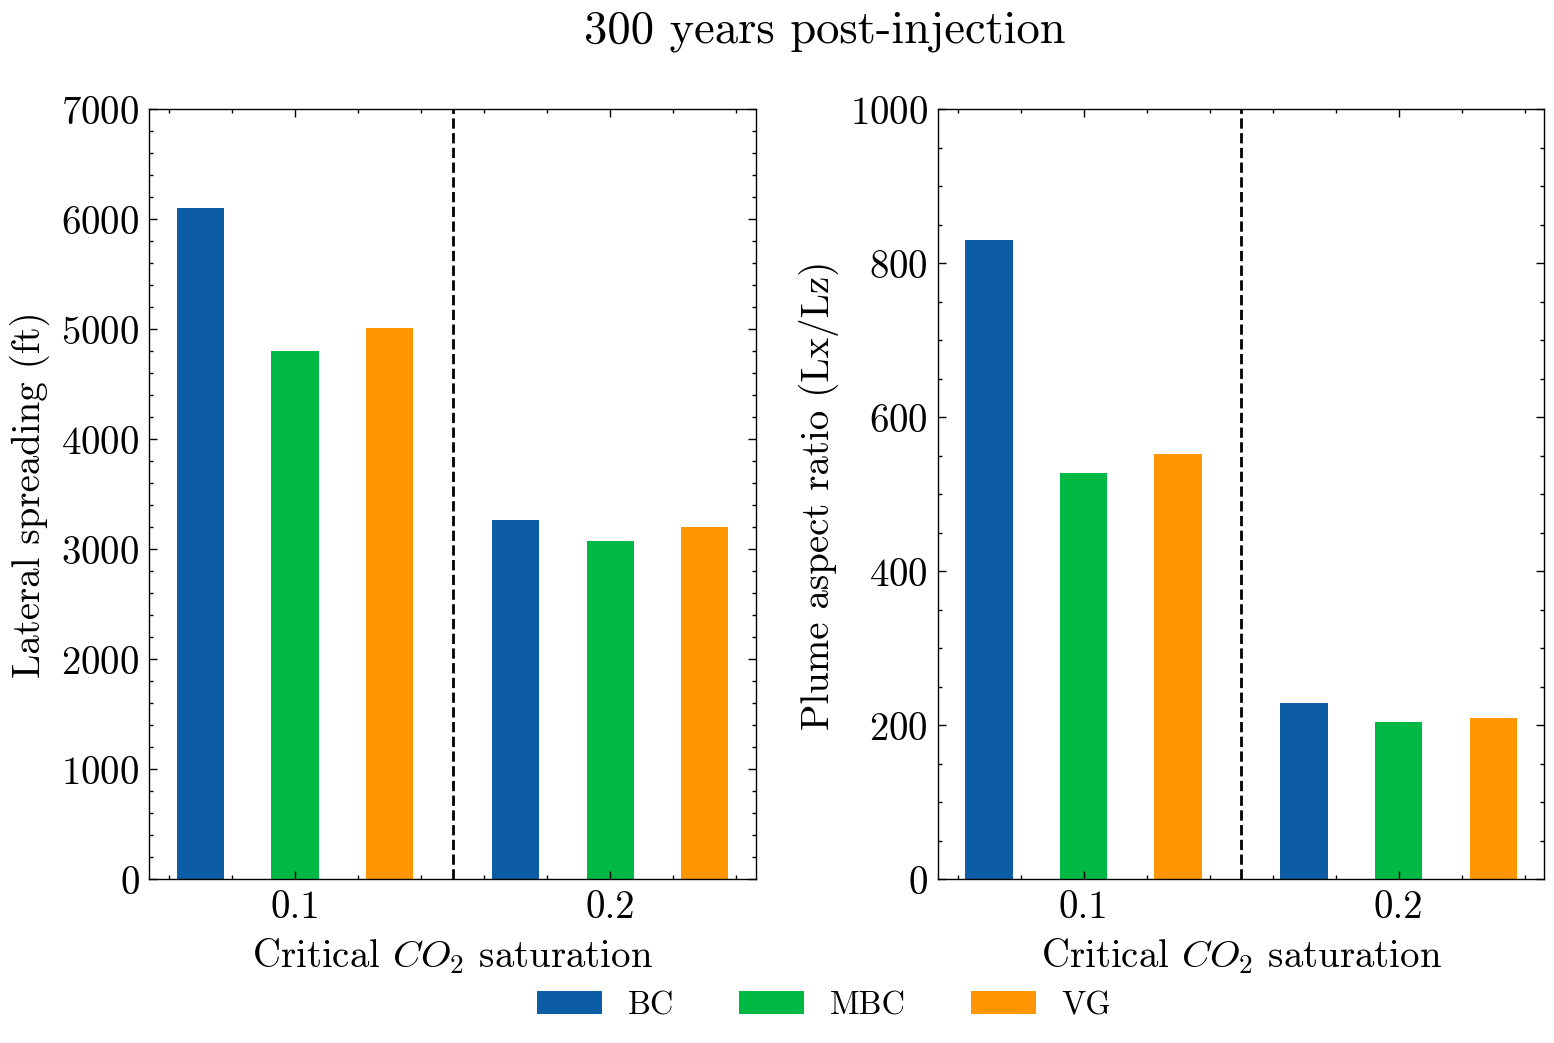

In [36]:
# 5 Lateral displacement and aspect ratio of the plume
labels = ['BC','MBC','VG']
scenarios = ['0.1','0.2']
fig, ax = plt.subplots(1,2,figsize=(9,5),dpi=200)

for j in range(2):
    ax[0].bar((j+1)-0.3,2*np.sqrt(mts_bc[f'S{j+1}'][3][-1]),width=0.15,color='C0',label=labels[0])
    ax[0].bar((j+1),2*np.sqrt(mts_mbc[f'S{j+1}'][3][-1]),width=0.15,color='C1',label=labels[1])
    ax[0].bar((j+1)+0.3,2*np.sqrt(mts_vg[f'S{j+1}'][3][-1]),width=0.15,color='C2',label=labels[2])

    ax[1].bar((j+1)-0.3,mts_bc[f'S{j+1}'][3][-1]/mts_bc[f'S{j+1}'][4][-1],width=0.15,color='C0',label=labels[0])
    ax[1].bar((j+1),mts_mbc[f'S{j+1}'][3][-1]/mts_mbc[f'S{j+1}'][4][-1],width=0.15,color='C1',label=labels[1])
    ax[1].bar((j+1)+0.3,mts_vg[f'S{j+1}'][3][-1]/mts_vg[f'S{j+1}'][4][-1],width=0.15,color='C2',label=labels[2])
    
ax[0].set_xticks(np.arange(1,3,1))
ax[0].set_xticklabels(scenarios)
ax[0].set_xlabel('Critical $CO_2$ saturation')
ax[0].set_ylabel('Lateral spreading (ft)')
ax[0].set_ylim(0,7000)

ax[1].set_xticks(np.arange(1,3,1))
ax[1].set_xticklabels(scenarios)
ax[1].set_xlabel('Critical $CO_2$ saturation')
ax[1].set_ylabel('Plume aspect ratio (Lx/Lz)')
ax[1].set_ylim(0,1000)

for a in ax:
    a.vlines(1.5,0,7000,linestyle='dashed',color='black')

handles, labels = ax[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))

fig.legend(by_label.values(), by_label.keys(), loc='lower center',ncol=3,
            fontsize='small',bbox_to_anchor=(0.5,-0.06),fancybox=True, shadow=True)
fig.suptitle('300 years post-injection')
plt.subplots_adjust(wspace=0.3)
plt.show()

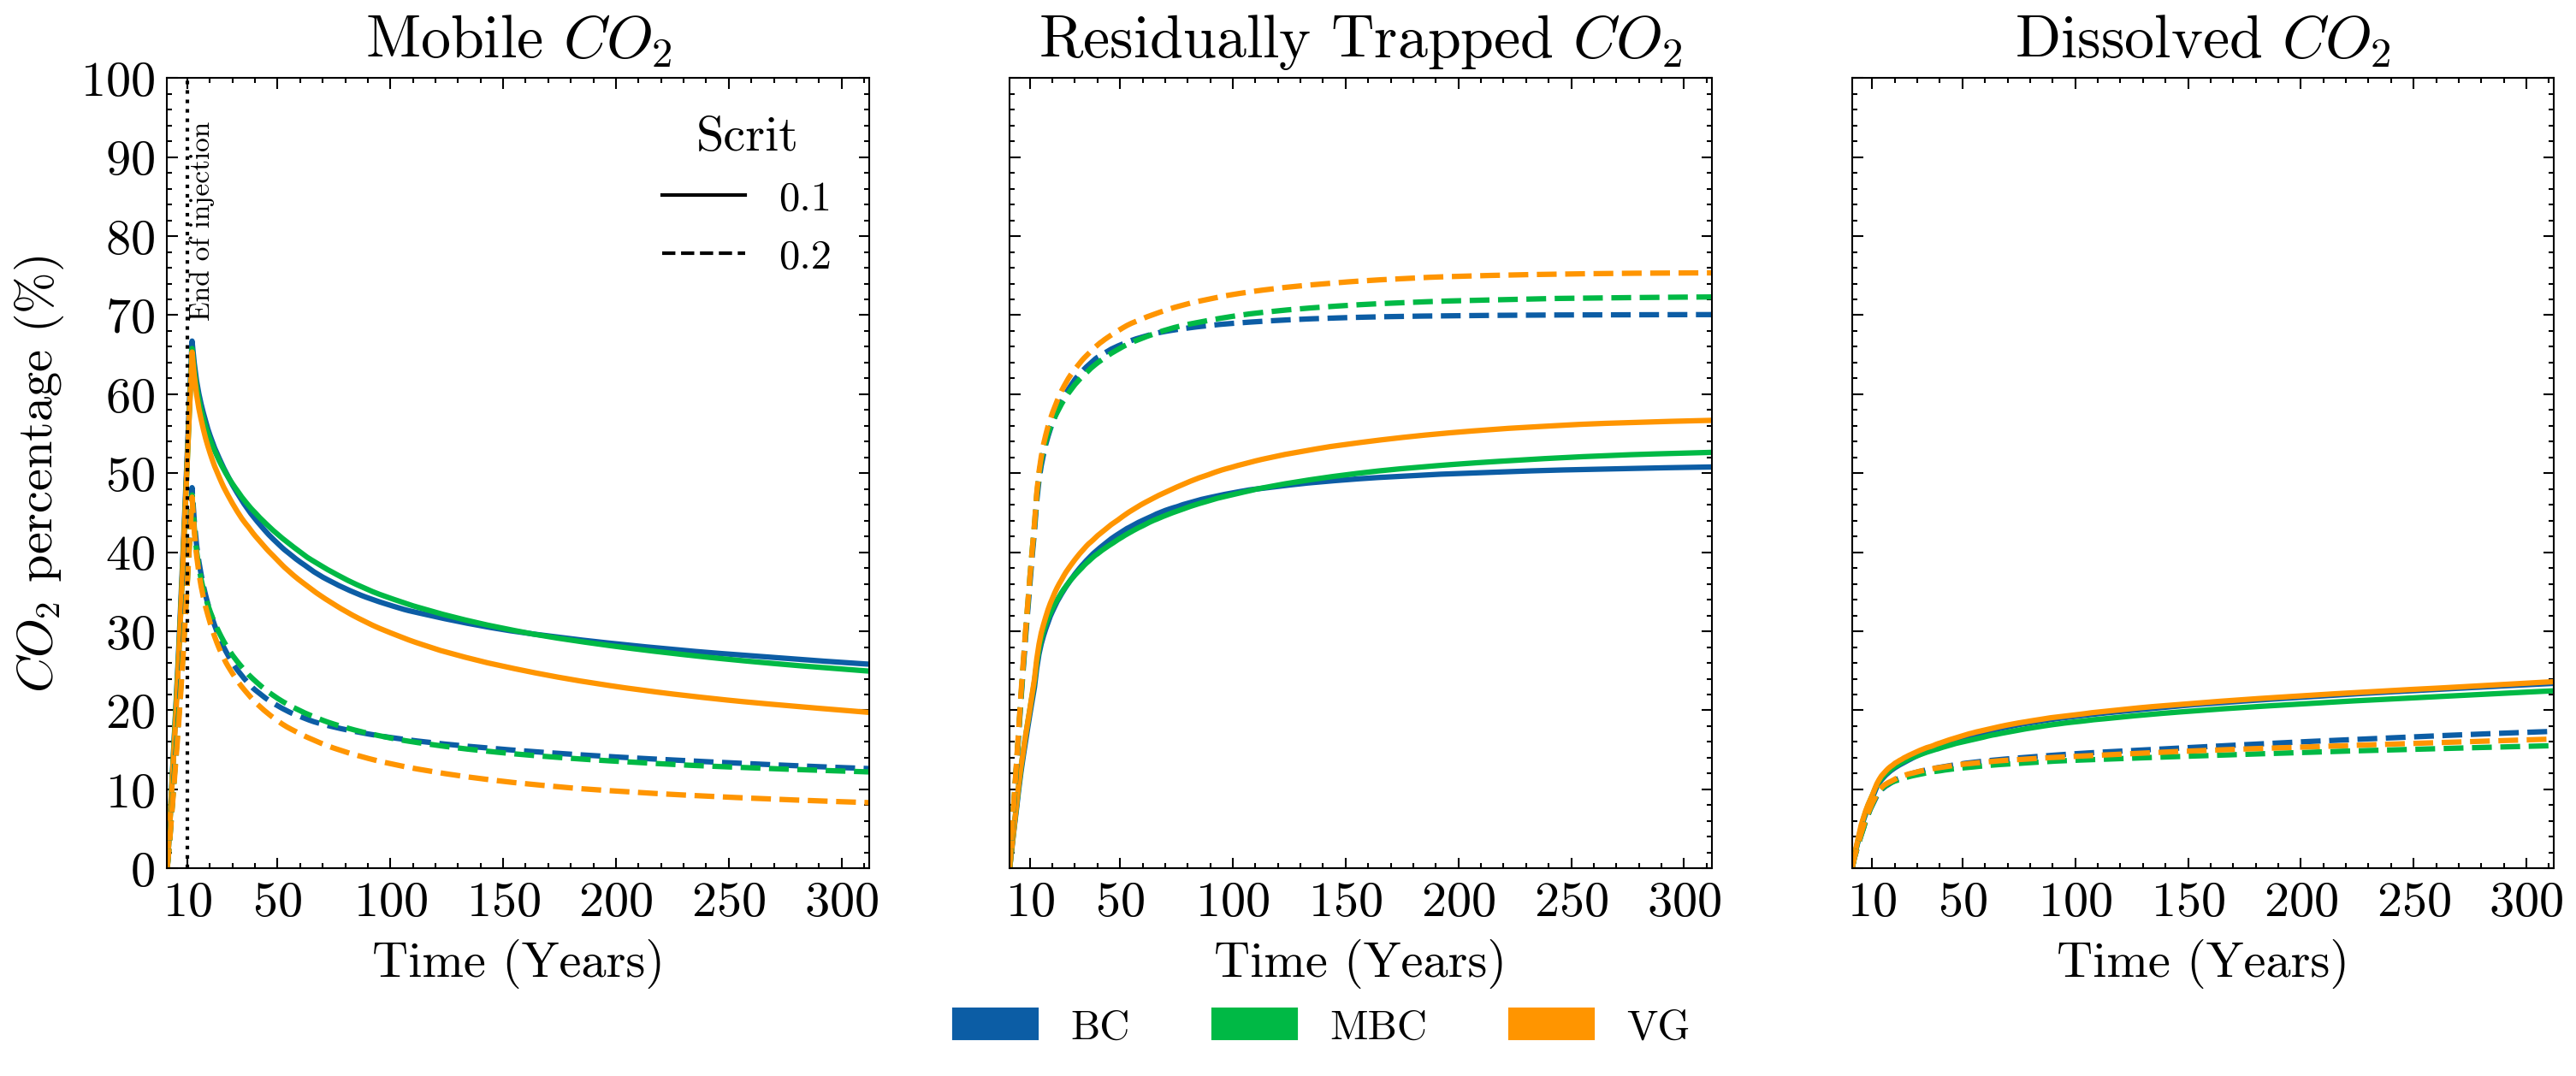

In [42]:
lstyles = ['solid','dashed']
import matplotlib.dates as mdates
import matplotlib.lines as mlines
fig, axs = plt.subplots(1,3,figsize=(12,4),dpi=300,sharex=True,sharey=True)
for i in range(2):
    axs[0].plot(bc_sp[f'S{i+1}']['Time (days)']/365,(bc_sp[f'S{i+1}']['Super-critical']-bc_sp[f'S{i+1}']['Trapped'])/4.83e9*100,
                linewidth=1.5,linestyle=lstyles[i],label=f'0.{i+1}',color='C0')
    axs[0].plot(mbc_sp[f'S{i+1}']['Time (days)']/365,(mbc_sp[f'S{i+1}']['Super-critical']-mbc_sp[f'S{i+1}']['Trapped'])/4.83e9*100,
                linewidth=1.5,linestyle=lstyles[i],label=f'0.{i+1}',color='C1')
    axs[0].plot(vg_sp[f'S{i+1}']['Time (days)']/365,(vg_sp[f'S{i+1}']['Super-critical']-vg_sp[f'S{i+1}']['Trapped'])/4.83e9*100,
                linewidth=1.5,linestyle=lstyles[i],label=f'0.{i+1}',color='C2')
    
    axs[1].plot(bc_sp[f'S{i+1}']['Time (days)']/365,bc_sp[f'S{i+1}']['Trapped']/4.83e9*100,linewidth=1.5,
                linestyle=lstyles[i],color='C0')
    axs[1].plot(mbc_sp[f'S{i+1}']['Time (days)']/365,mbc_sp[f'S{i+1}']['Trapped']/4.83e9*100,linewidth=1.5,
                linestyle=lstyles[i],color='C1')
    axs[1].plot(vg_sp[f'S{i+1}']['Time (days)']/365,vg_sp[f'S{i+1}']['Trapped']/4.83e9*100,linewidth=1.5,
                linestyle=lstyles[i],color='C2')
    
    axs[2].plot(bc_sp[f'S{i+1}']['Time (days)']/365,bc_sp[f'S{i+1}']['Dissolved']/4.83e9*100,
                linewidth=1.5, linestyle=lstyles[i],color='C0')
    axs[2].plot(mbc_sp[f'S{i+1}']['Time (days)']/365,mbc_sp[f'S{i+1}']['Dissolved']/4.83e9*100,
                linewidth=1.5, linestyle=lstyles[i],color='C1')
    axs[2].plot(vg_sp[f'S{i+1}']['Time (days)']/365,vg_sp[f'S{i+1}']['Dissolved']/4.83e9*100,
                linewidth=1.5, linestyle=lstyles[i],color='C2')
    
    
    #print(special_dict_real[f'S{i+1}']['Dissolved'] +special_dict_real[f'S{i+1}']['Super-critical'])
    #axs[1].plot(special_dict[f'S{i+1}']['Time (days)']/365,special_dict[f'S{i+1}']['Trapped'],linewidth=1,linestyle='dashed',label=f'S{i+1}')
#ax.plot(special_dict_real['S1']['Time (days)'],special_dict_real['S1']['Dissolved'] + special_dict_real['S1']['Super-critical'],linewidth=1,linestyle='solid',label='Total')

axs[0].set_ylabel('$CO_2$ percentage (%)')
axs[0].set_ylim(0,100)
axs[0].set_yticks(np.arange(0,110,10))
axs[0].vlines(10,0,100,linestyle='dotted',color='black')
axs[0].text(11,70,'End of injection',rotation=90,fontsize=8)

axs[0].set_title('Mobile $CO_2$')
axs[1].set_title('Residually Trapped $CO_2$')
axs[2].set_title('Dissolved $CO_2$')

# Create legend
blue_patch = mpatches.Patch(color='C0',label='BC')
green_patch = mpatches.Patch(color='C1',label='MBC')
orange_patch = mpatches.Patch(color='C2',label='VG')

for ax in axs: 
    ax.set_xlabel('Time (Years)')
    ax.set_xticks([10,50,100,150,200,250,300,350])
    ax.margins(0,0)

axs[0].legend(handles=[mlines.Line2D([], [], color='black', ls='solid', label='0.1'), 
                       mlines.Line2D([], [], color='black', ls='dashed', label='0.2')],
              title='Scrit',fontsize='small')
fig.legend(handles=[blue_patch,green_patch,orange_patch],loc='lower center',ncols=3,
           fontsize='small',bbox_to_anchor=(0.5,-0.1))
plt.show()

In [38]:
# Estimate indexes
idx_mbc = {};idx_bc = {};idx_vg = {}
for i in range(2):
    idx_mbc[f'S{i+1}'] = bdp.indexes(mbc_sp[f'S{i+1}']['Dissolved'],mbc_sp[f'S{i+1}']['Trapped'],mbc_sp[f'S{i+1}']['Super-critical'],4.83e9)
    idx_bc[f'S{i+1}'] = bdp.indexes(bc_sp[f'S{i+1}']['Dissolved'],bc_sp[f'S{i+1}']['Trapped'],bc_sp[f'S{i+1}']['Super-critical'],4.83e9)
    idx_vg[f'S{i+1}'] = bdp.indexes(vg_sp[f'S{i+1}']['Dissolved'],vg_sp[f'S{i+1}']['Trapped'],vg_sp[f'S{i+1}']['Super-critical'],4.83e9)


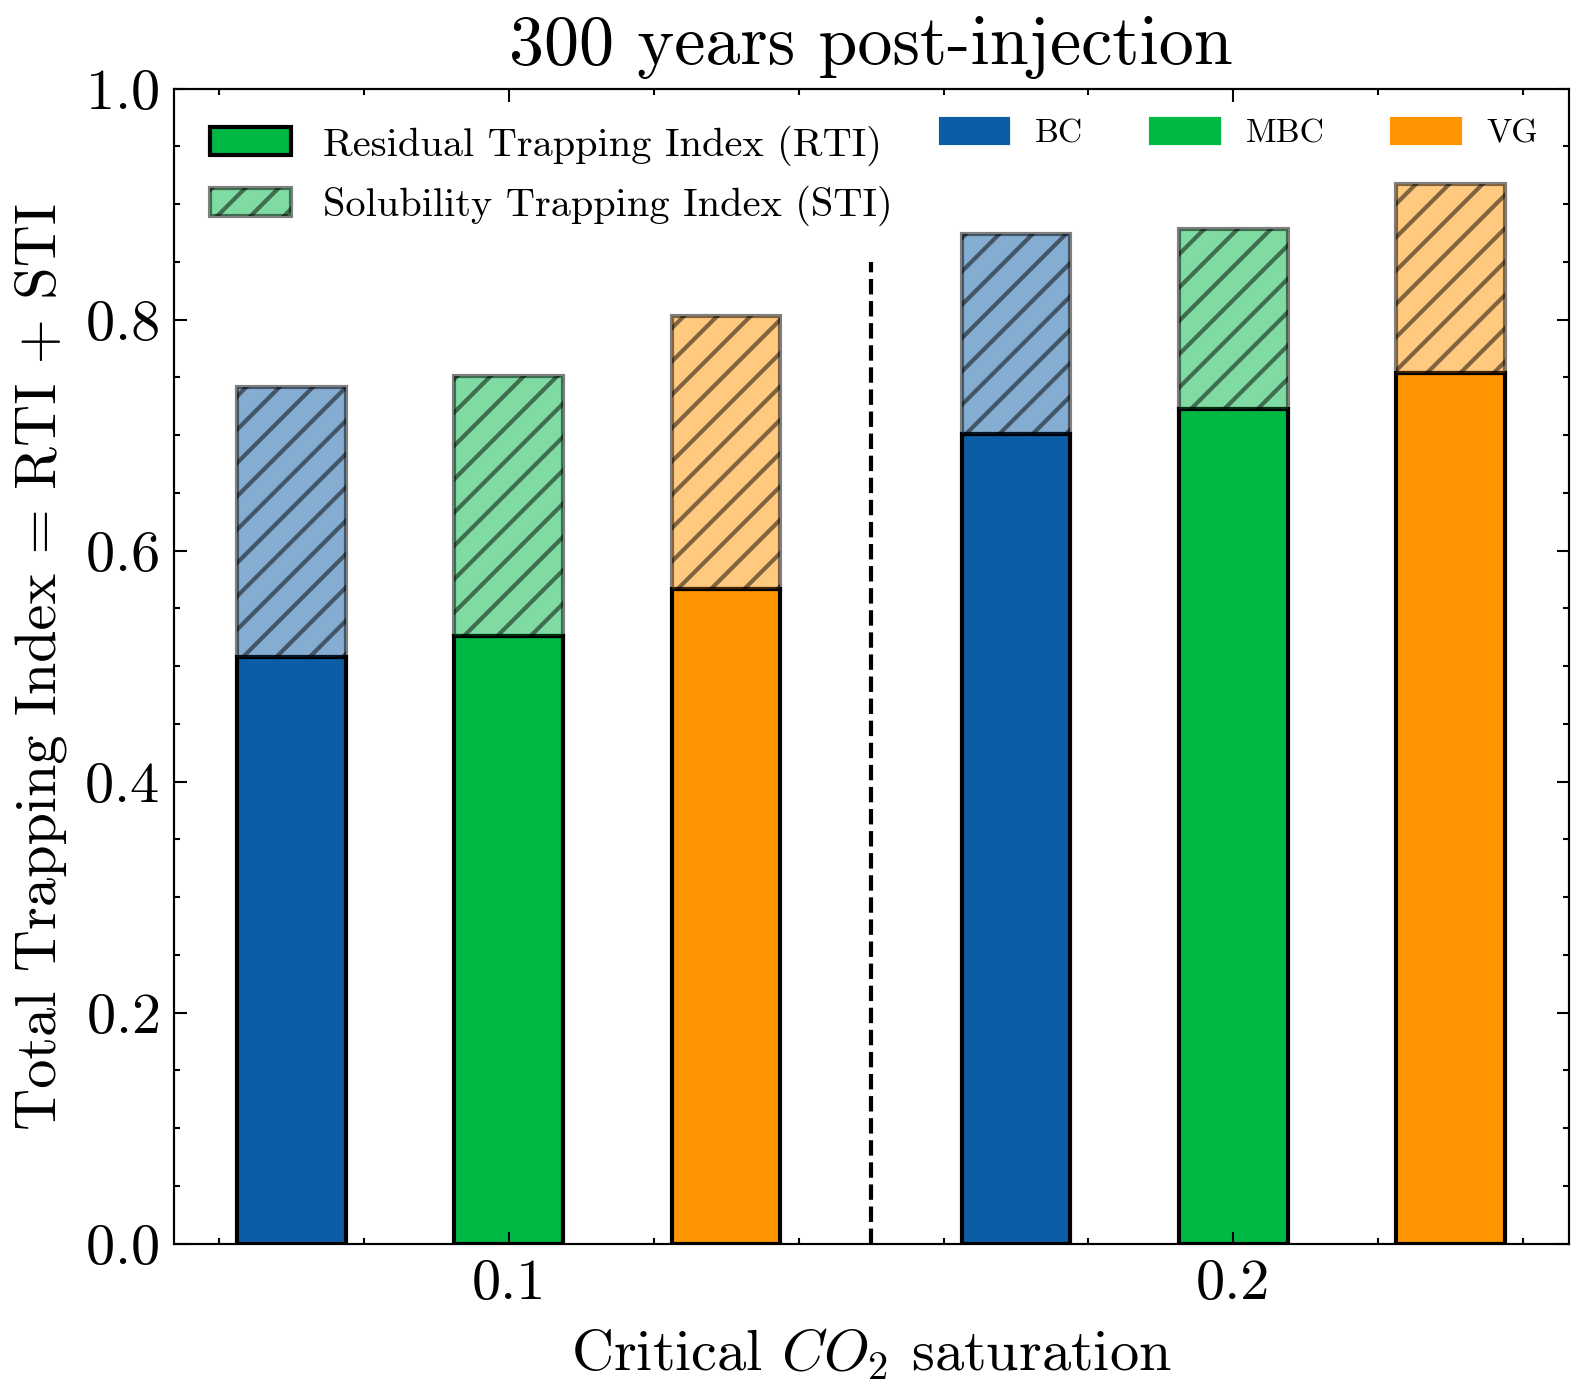

In [39]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(6,5),dpi=300)

for j in range(size):
    ax.bar((j+1)-0.3,idx_bc[f'S{j+1}'][0][-1],width=0.15,color='C0',edgecolor='black')
    ax.bar((j+1)-0.3,idx_bc[f'S{j+1}'][1][-1],width=0.15,color='C0',hatch='///',bottom=idx_bc[f'S{j+1}'][0][-1],edgecolor='black',alpha=0.5)
    
    ax.bar((j+1),idx_mbc[f'S{j+1}'][0][-1],width=0.15,color='C1',edgecolor='black',label='Residual Trapping Index (RTI)')
    ax.bar((j+1),idx_mbc[f'S{j+1}'][1][-1],width=0.15,color='C1',hatch='///',bottom=idx_mbc[f'S{j+1}'][0][-1],edgecolor='black',alpha=0.5,label='Solubility Trapping Index (STI)')

    ax.bar((j+1)+0.3,idx_vg[f'S{j+1}'][0][-1],width=0.15,color='C2',edgecolor='black')
    ax.bar((j+1)+0.3,idx_vg[f'S{j+1}'][1][-1],width=0.15,color='C2',hatch='///',bottom=idx_vg[f'S{j+1}'][0][-1],edgecolor='black',alpha=0.5)
ax.set_xticks(np.arange(1,3,1))
ax.set_xticklabels(scenarios)
ax.set_xlabel('Critical $CO_2$ saturation')
ax.set_ylabel('Total Trapping Index = RTI + STI')
ax.set_ylim(0,1)
ax.set_title('300 years post-injection')

ax.vlines(1.5,0,0.85,linestyle='dashed',color='black')

# Create legend
ax1=ax.twinx()
ax1.set_yticklabels([])
blue_patch = mpatches.Patch(color='C0',label='BC')
green_patch = mpatches.Patch(color='C1',label='MBC')
orange_patch = mpatches.Patch(color='C2',label='VG')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='upper left',ncol=1,
            fontsize='x-small',fancybox=True, shadow=True)

ax1.legend(handles=[blue_patch,green_patch,orange_patch],loc='upper right',ncols=3,fontsize='xx-small')
plt.show()

In [13]:

gas_dict = {}; p_dict = {}; sp_dict = {}; trap_dict = {}

sims = ['MBC','BC','VG']
for sim in sims:
    gas_dict[sim] = bdp.mul_list_to_array(path + paths[sims.index(sim)], 'Het2D_real Gas Saturation.gslib',shape,size=8)
    trap_dict[sim] = bdp.mul_list_to_array(path + paths[sims.index(sim)],'Het2D_real Sg _ Sgc _ Hysteresis Dynamic trapped gas saturation.gslib',shape,size=8)
    p_dict[sim] = bdp.mul_list_to_array(path + paths[sims.index(sim)],'Het2D_real Pressure.gslib',shape,size=2)
    sp_dict[sim] = bdp.special_table(path + paths[sims.index(sim)],'special.xlsx')


FileNotFoundError: C:/Users/ubillusj/Box/2022-2023 GRA/Simulation/CMG_Ubillus/Ubillus_simulations/Simulations_Cap_Pres/MBC/Results/Het2D_real Gas Saturation.gslib not found.

KeyError: 'MBC'

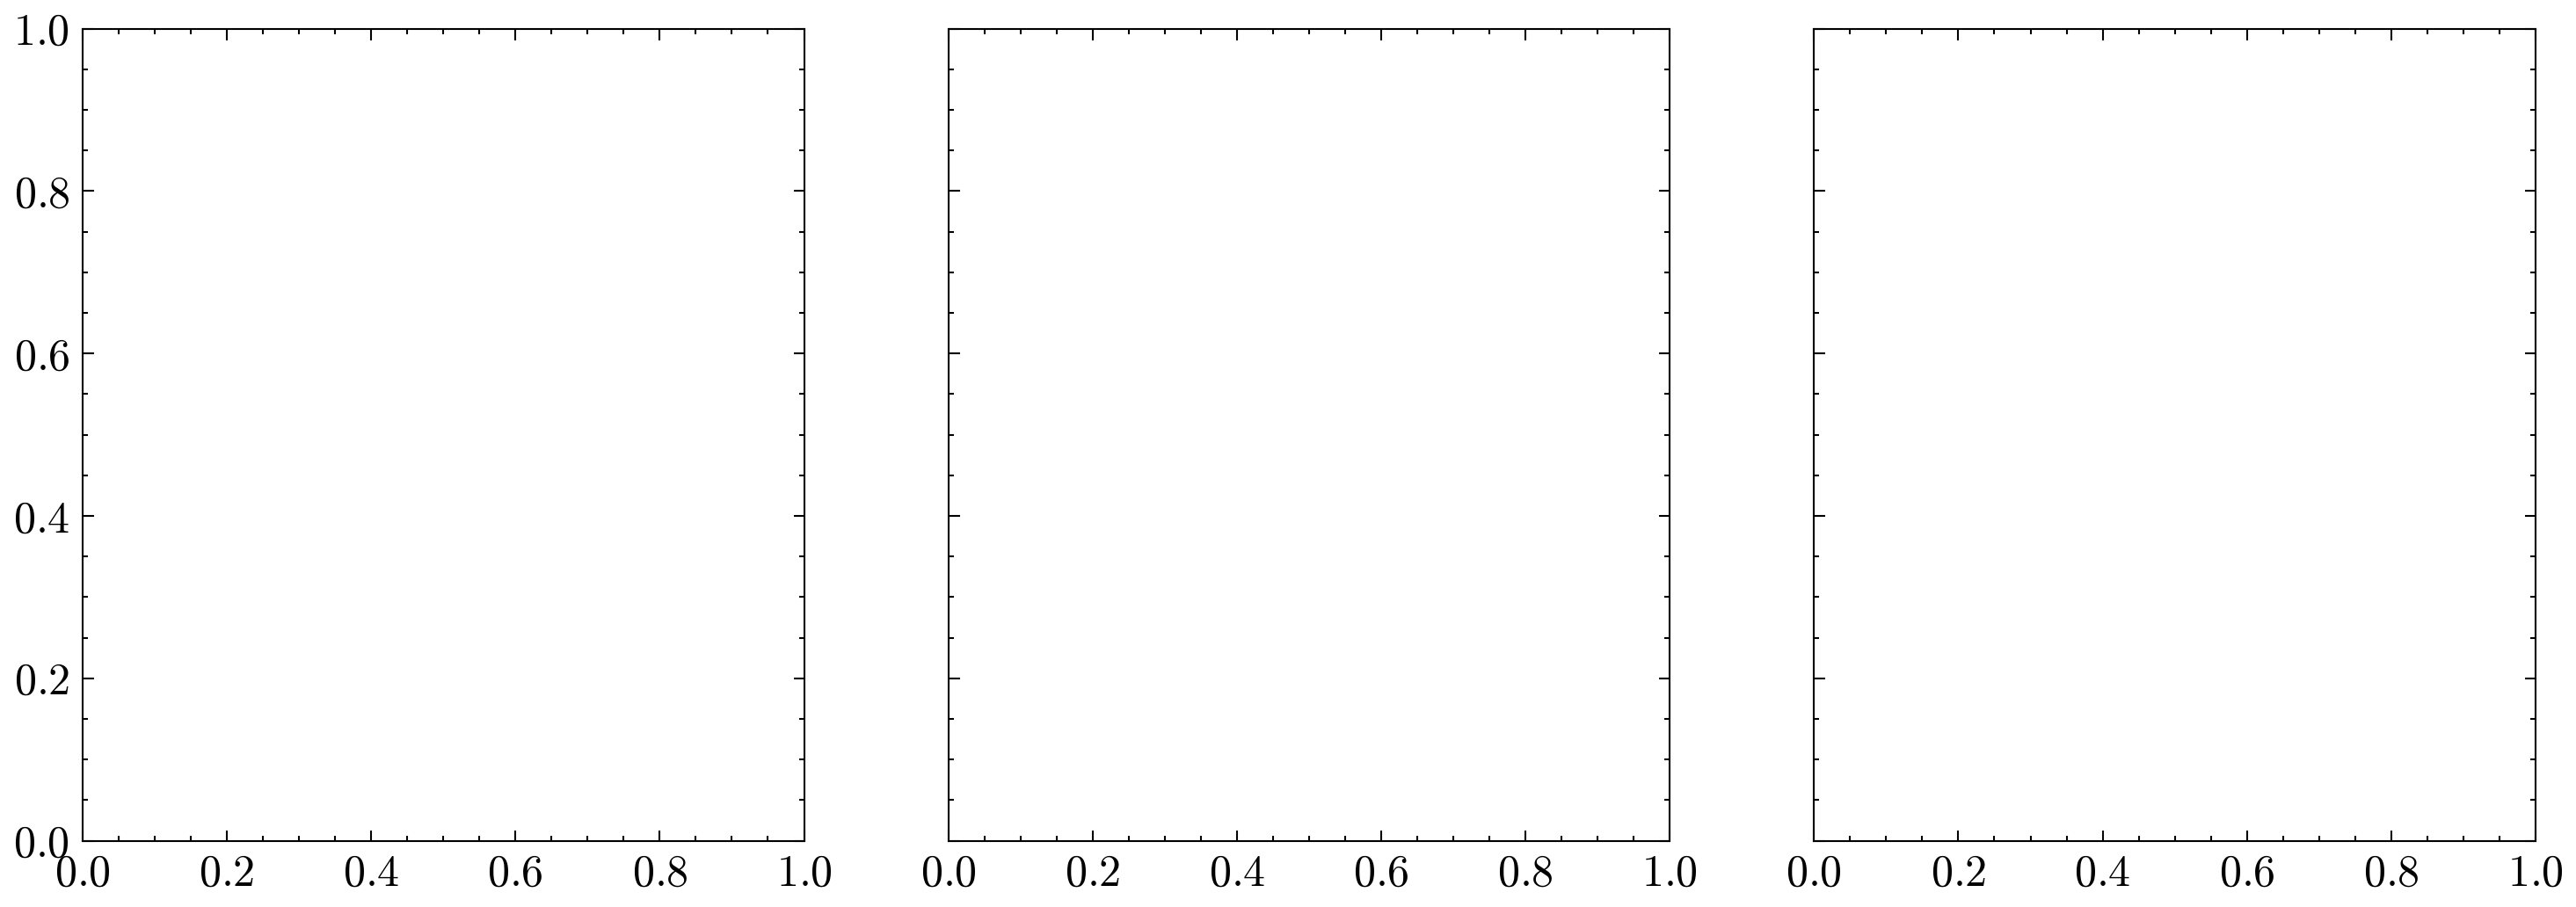

In [14]:
# 3 Time series CO2 moles
colors = ['C0','C1','C2']
import matplotlib.dates as mdates
fig, axs = plt.subplots(1,3,figsize=(12,4),dpi=300,sharex=True,sharey=True)
for sim in sims:
    axs[2].plot(sp_dict[sim]['Time (days)']/365,sp_dict[sim]['Dissolved']/4.83e9*100,linewidth=1.5,linestyle='dashed',label=sim,color=colors[sims.index(sim)])
    axs[1].plot(sp_dict[sim]['Time (days)']/365,sp_dict[sim]['Trapped']/4.83e9*100,linewidth=1.5,linestyle='dashed',label=sim,color=colors[sims.index(sim)])
    axs[0].plot(sp_dict[sim]['Time (days)']/365,(sp_dict[sim]['Super-critical']-sp_dict[sim]['Trapped'])/4.83e9*100,linewidth=1.5,linestyle='dashed',label=sim,color=colors[sims.index(sim)])
    #print(special_dict_real[f'S{i+1}']['Dissolved'] +special_dict_real[f'S{i+1}']['Super-critical'])
    #axs[1].plot(special_dict[f'S{i+1}']['Time (days)']/365,special_dict[f'S{i+1}']['Trapped'],linewidth=1,linestyle='dashed',label=f'S{i+1}')
#ax.plot(special_dict_real['S1']['Time (days)'],special_dict_real['S1']['Dissolved'] + special_dict_real['S1']['Super-critical'],linewidth=1,linestyle='solid',label='Total')

axs[0].set_ylabel('$CO_2$ percentage (%)')
axs[0].set_ylim(0,100)
axs[0].set_yticks(np.arange(0,110,10))
axs[2].legend(title='$S_{crit}$')
axs[0].vlines(10,0,100,linestyle='dashed',color='black')
axs[0].text(11,70,'End of injection',rotation=90,fontsize=8)

axs[0].set_title('Free $CO_2$')
axs[1].set_title('Residually Trapped $CO_2$')
axs[2].set_title('Dissolved $CO_2$')

for ax in axs: 
    ax.set_xlabel('Time (Years)')
    ax.set_xticks([10,50,100,150,200,250,300,350])
    ax.margins(0,0)

plt.show()

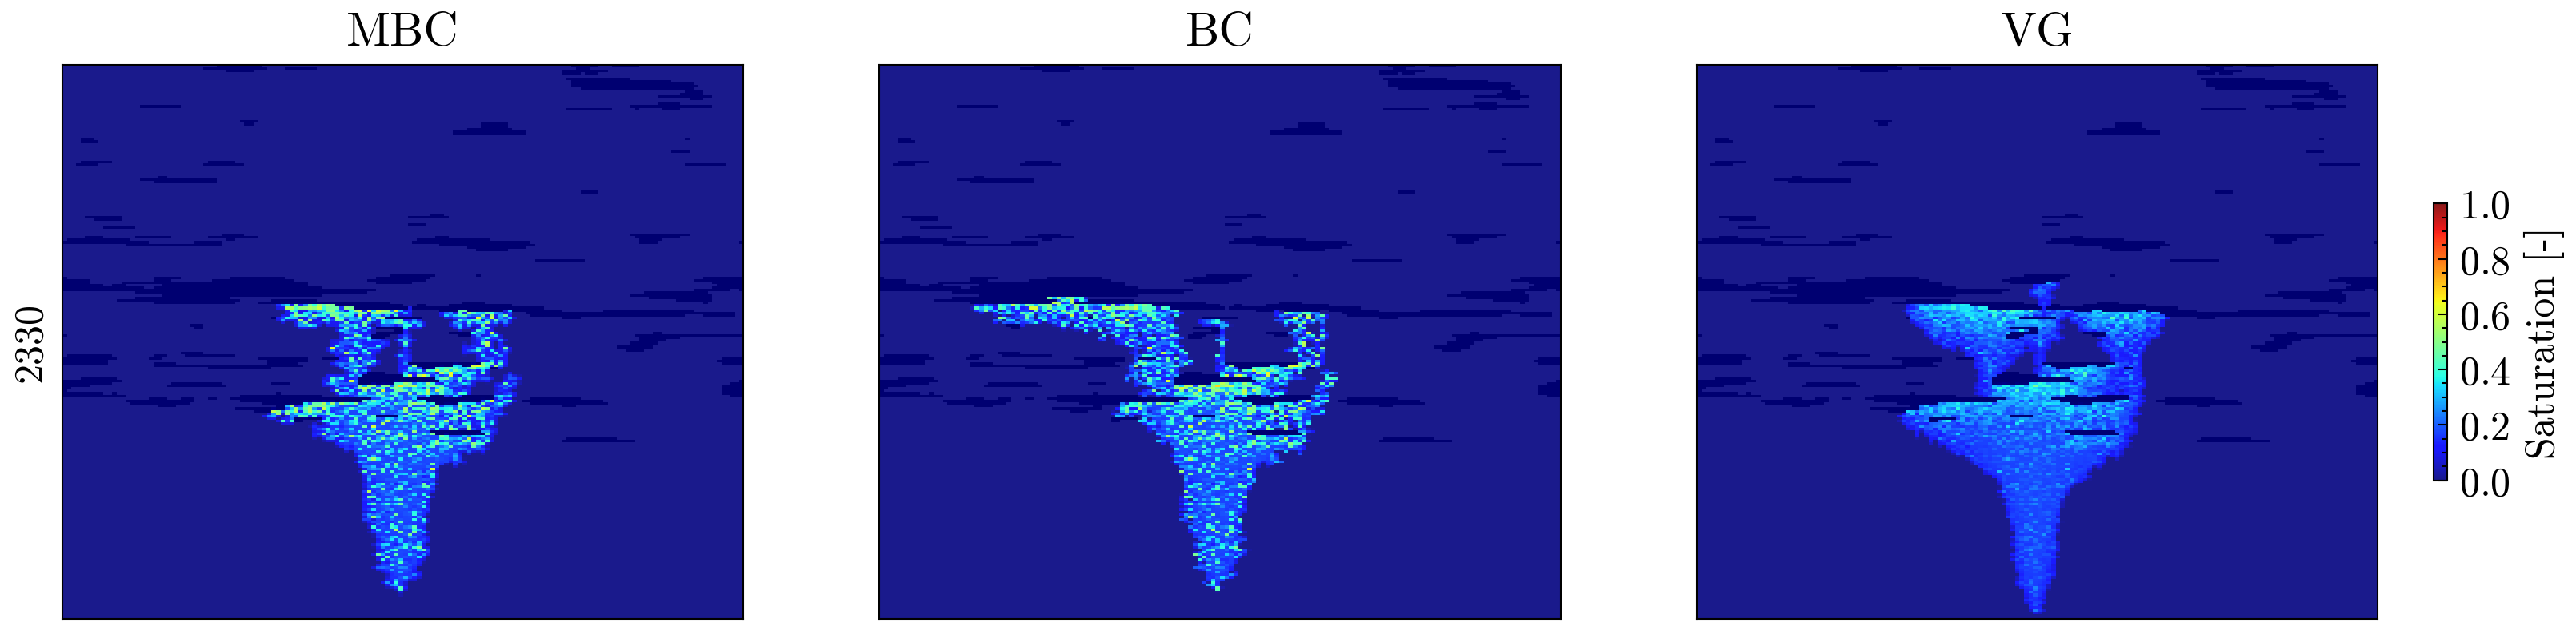

In [13]:
size = 3
fig,ax = plt.subplots(1,size,figsize=(15,3),dpi=300)
for i in range(size):
    ax[i].imshow(rel_perm,cmap='binary',aspect='auto')
    im = ax[i].imshow(gas_dict[sims[i]][:,:,6],cmap='jet',vmin=0.0,vmax=1,aspect='auto',alpha=0.9)
    ax[i].set_title(sims[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
'''
    ax[1,i].imshow(rel_perm,cmap='binary',aspect='auto')
    ax[1,i].imshow(gas_dict[sims[i]][:,:,4],cmap='jet',vmin=0.0,vmax=1,aspect='auto',alpha=0.9)
    ax[1,i].set_xticks([])
    ax[1,i].set_yticks([])

    ax[2,i].imshow(rel_perm,cmap='binary',aspect='auto')
    ax[2,i].imshow(gas_dict[sims[i]][:,:,6],cmap='jet',vmin=0.0,vmax=1,aspect='auto',alpha=0.9)
    ax[2,i].set_xticks([])
    ax[2,i].set_yticks([])

    ax[0,0].set_ylabel('2030')
    ax[1,0].set_ylabel('2130')

'''
ax[0].set_ylabel('2330')


fig.colorbar(im, ax=ax.ravel().tolist(), orientation = 'vertical',shrink=0.5,pad=0.02,ticks=[0,0.2,0.4,0.6,0.8,1],label='Saturation [-]')
plt.show()

c:\Users\ubillusj\Desktop\CMG\batch_data_processing.py:115: RuntimeWarning: Mean of empty slice
  mean_sat = np.nanmean(sat_copy,axis=1)
c:\Users\ubillusj\Desktop\CMG\batch_data_processing.py:120: RuntimeWarning: Mean of empty slice
  mean_trp = np.nanmean(trp_copy,axis=1)


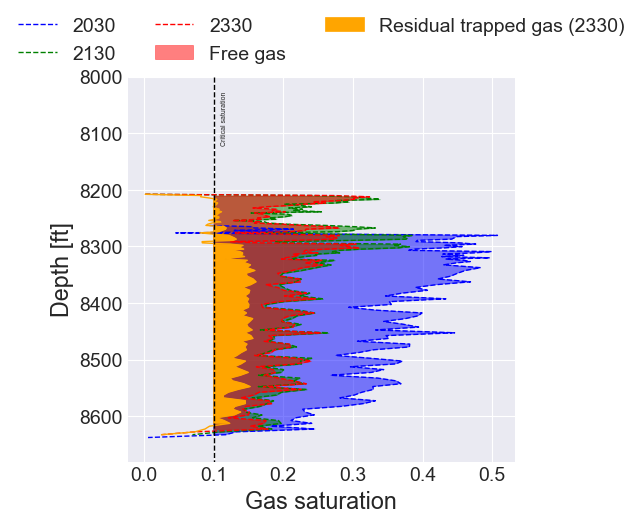

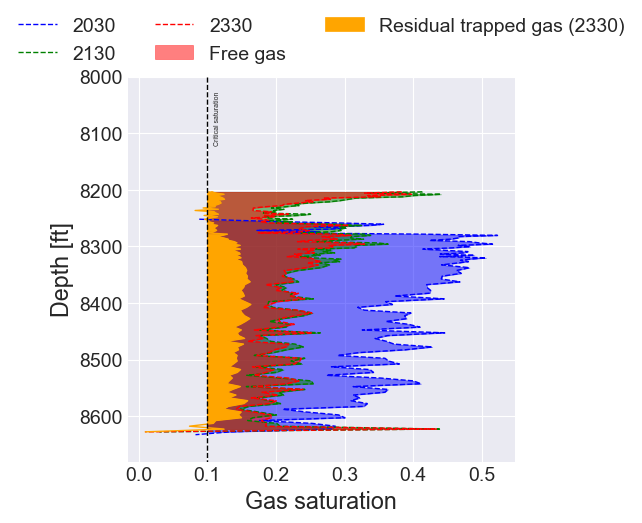

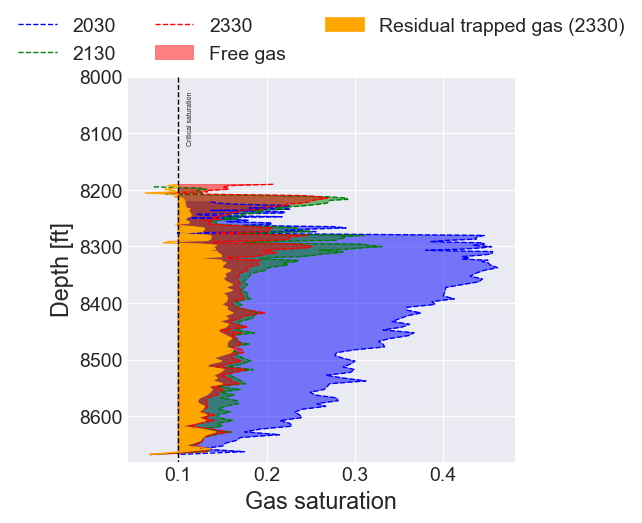

In [22]:
for i in range(size):
    fig = bdp.saturation_profile(gas_dict[sims[i]],z,0.1,gas_trapped=trap_dict[sims[i]],trapped=True)

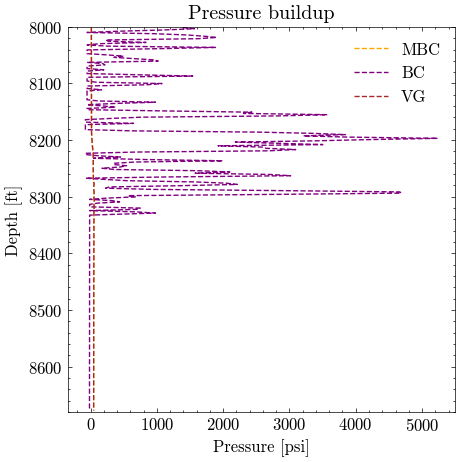

In [37]:
# Pressure profiles 

#colors = ['C3','C4','C5']
#mean_pinit = np.mean(p_dict['MBC'][:,:,0],axis=1)
fig, ax = plt.subplots(figsize=(5,5))
for i in range(size):
    mean_pbup = np.mean(p_dict[sims[i]][:,:,1],axis=1) - np.mean(p_dict['MBC'][:,:,0],axis=1)
    ax.plot(mean_pbup,z[:,0],color=colors[i],linewidth=1,linestyle='--',label=sims[i])
#ax.plot(mean_pinit,z[:,0],color='skyblue',linewidth=1,label='Pi')
ax.set_ylim(8000,8680)
ax.set_xlabel('Pressure [psi]')
ax.set_ylabel('Depth [ft]')
ax.set_title('Pressure buildup')
ax.invert_yaxis()
ax.legend()

plt.show()

In [14]:
# Estimate indexes
idx = {}
for i in range(size):
    idx[sims[i]] = bdp.indexes(sp_dict[sims[i]]['Dissolved'],sp_dict[sims[i]]['Trapped'],sp_dict[sims[i]]['Super-critical'],4.83e9)

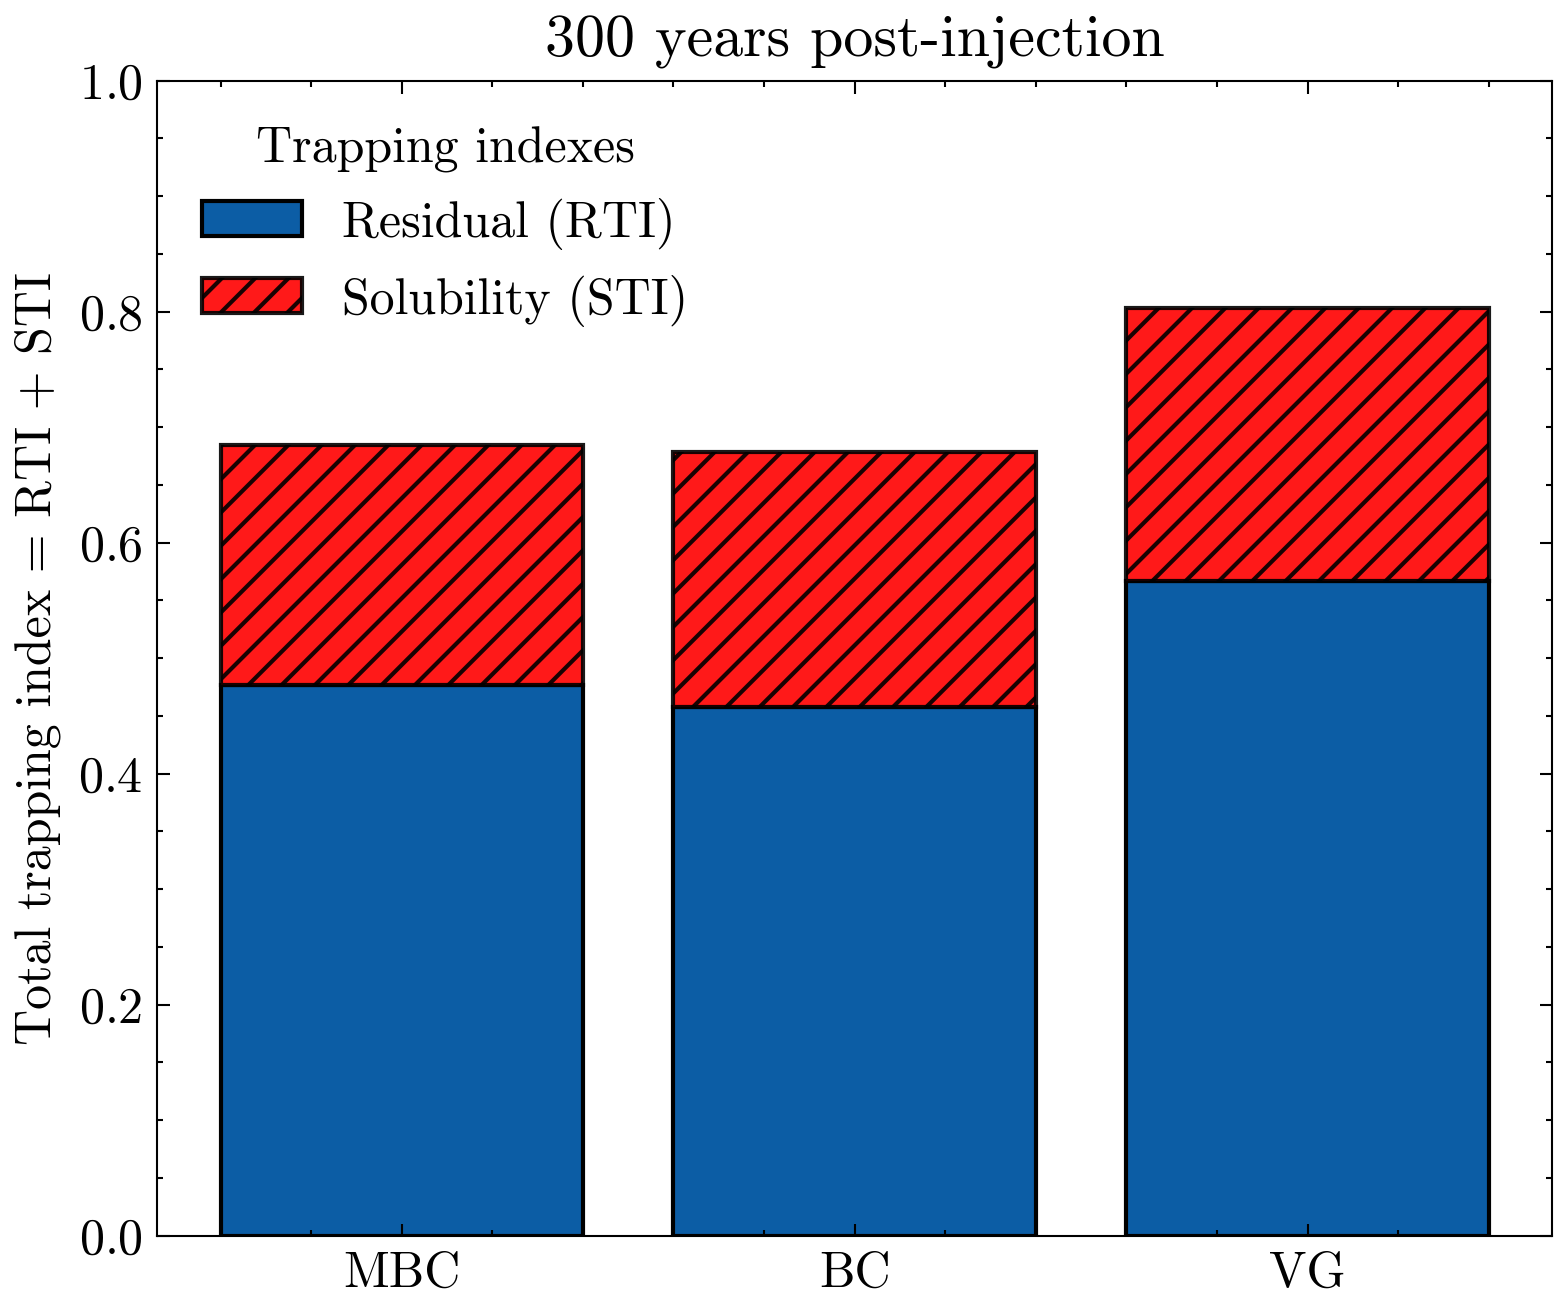

In [15]:
# Compare last value of indexes, plots as bar chart
fig, ax = plt.subplots(figsize=(6,5),dpi=300)
h0 = [idx['MBC'][0][-1],idx['BC'][0][-1],idx['VG'][0][-1]]
h1 = [idx['MBC'][1][-1],idx['BC'][1][-1],idx['VG'][1][-1]]
ax.bar(sims,h0,color='C0',label='Residual (RTI)',edgecolor='black')
ax.bar(sims,h1,color='red',bottom=h0,hatch='///',alpha=0.9,label='Solubility (STI)',edgecolor='black')
ax.set_ylabel('Total trapping index = RTI + STI')
ax.set_title('300 years post-injection')
ax.set_ylim(0,1)
ax.legend(title='Trapping indexes',loc='best')
plt.show() 


In [30]:
np.mean(trap_dict['BC'][:,:-1][trap_dict['BC'][:,:-1]>0.03].flatten())

0.13014641850183217

In [16]:
def moments(sat,poro,vol,x,z,sims):
    por_vol = poro*vol
    c10 = por_vol*x
    c01 = por_vol*z
    c20 = por_vol*x**2
    c02 = por_vol*z**2

    mts_dict = {}

    for i in range(len(sims)):
        
        m00 = np.sum(sat[sims[i]]*por_vol[:,:,None],axis=(0,1))
        m10, m01 = np.sum(sat[sims[i]]*c10[:,:,None],axis=(0,1)), np.sum(sat[sims[i]]*c01[:,:,None],axis=(0,1))
        m20, m02 = np.sum(sat[sims[i]]*c20[:,:,None],axis=(0,1)), np.sum(sat[sims[i]]*c02[:,:,None],axis=(0,1))

        #center of mass
        cx = m10/m00
        cz = m01/m00

        #spreading  
        sx = m20/m00 - cx**2
        sz = m02/m00 - cz**2

        mts_dict[sims[i]] = [m00,cx,cz,sx,sz]

    return mts_dict

mts_dict = moments(gas_dict,porosity,volume,x,z,sims)
print(mts_dict)

{'MBC': [array([ 5586352.61814707, 10669045.29250471, 10365039.94785421,
       10122054.90285701, 10000500.6652186 ,  9826527.23114748,
        9649475.23315627,  9604489.43156151]), array([16318.13058521, 16357.72126602, 16318.58585747, 16349.25605054,
       16361.54647797, 16358.82902079, 16342.94784977, 16340.0771244 ]), array([8449.77777761, 8408.65831372, 8368.76763998, 8361.78971438,
       8359.32220853, 8356.33330551, 8354.66778431, 8354.32200987]), array([ 327104.14407331, 1088856.67736462, 3078599.05161801,
       4019799.05973592, 4397096.64733103, 4878038.06544912,
       5127462.64054349, 5160549.02439436]), array([ 7568.61391713,  8151.68699427,  8406.04799151,  9441.3072139 ,
        9876.98848477, 10364.19733031, 10548.08840567, 10574.7079535 ])], 'BC': [array([ 5681382.81806431, 10859365.62287341, 10605170.8640846 ,
       10349889.67036511, 10223641.80731977, 10038016.22611573,
        9857170.32834441,  9810328.18907507]), array([16333.15452854, 16385.4834366 , 161

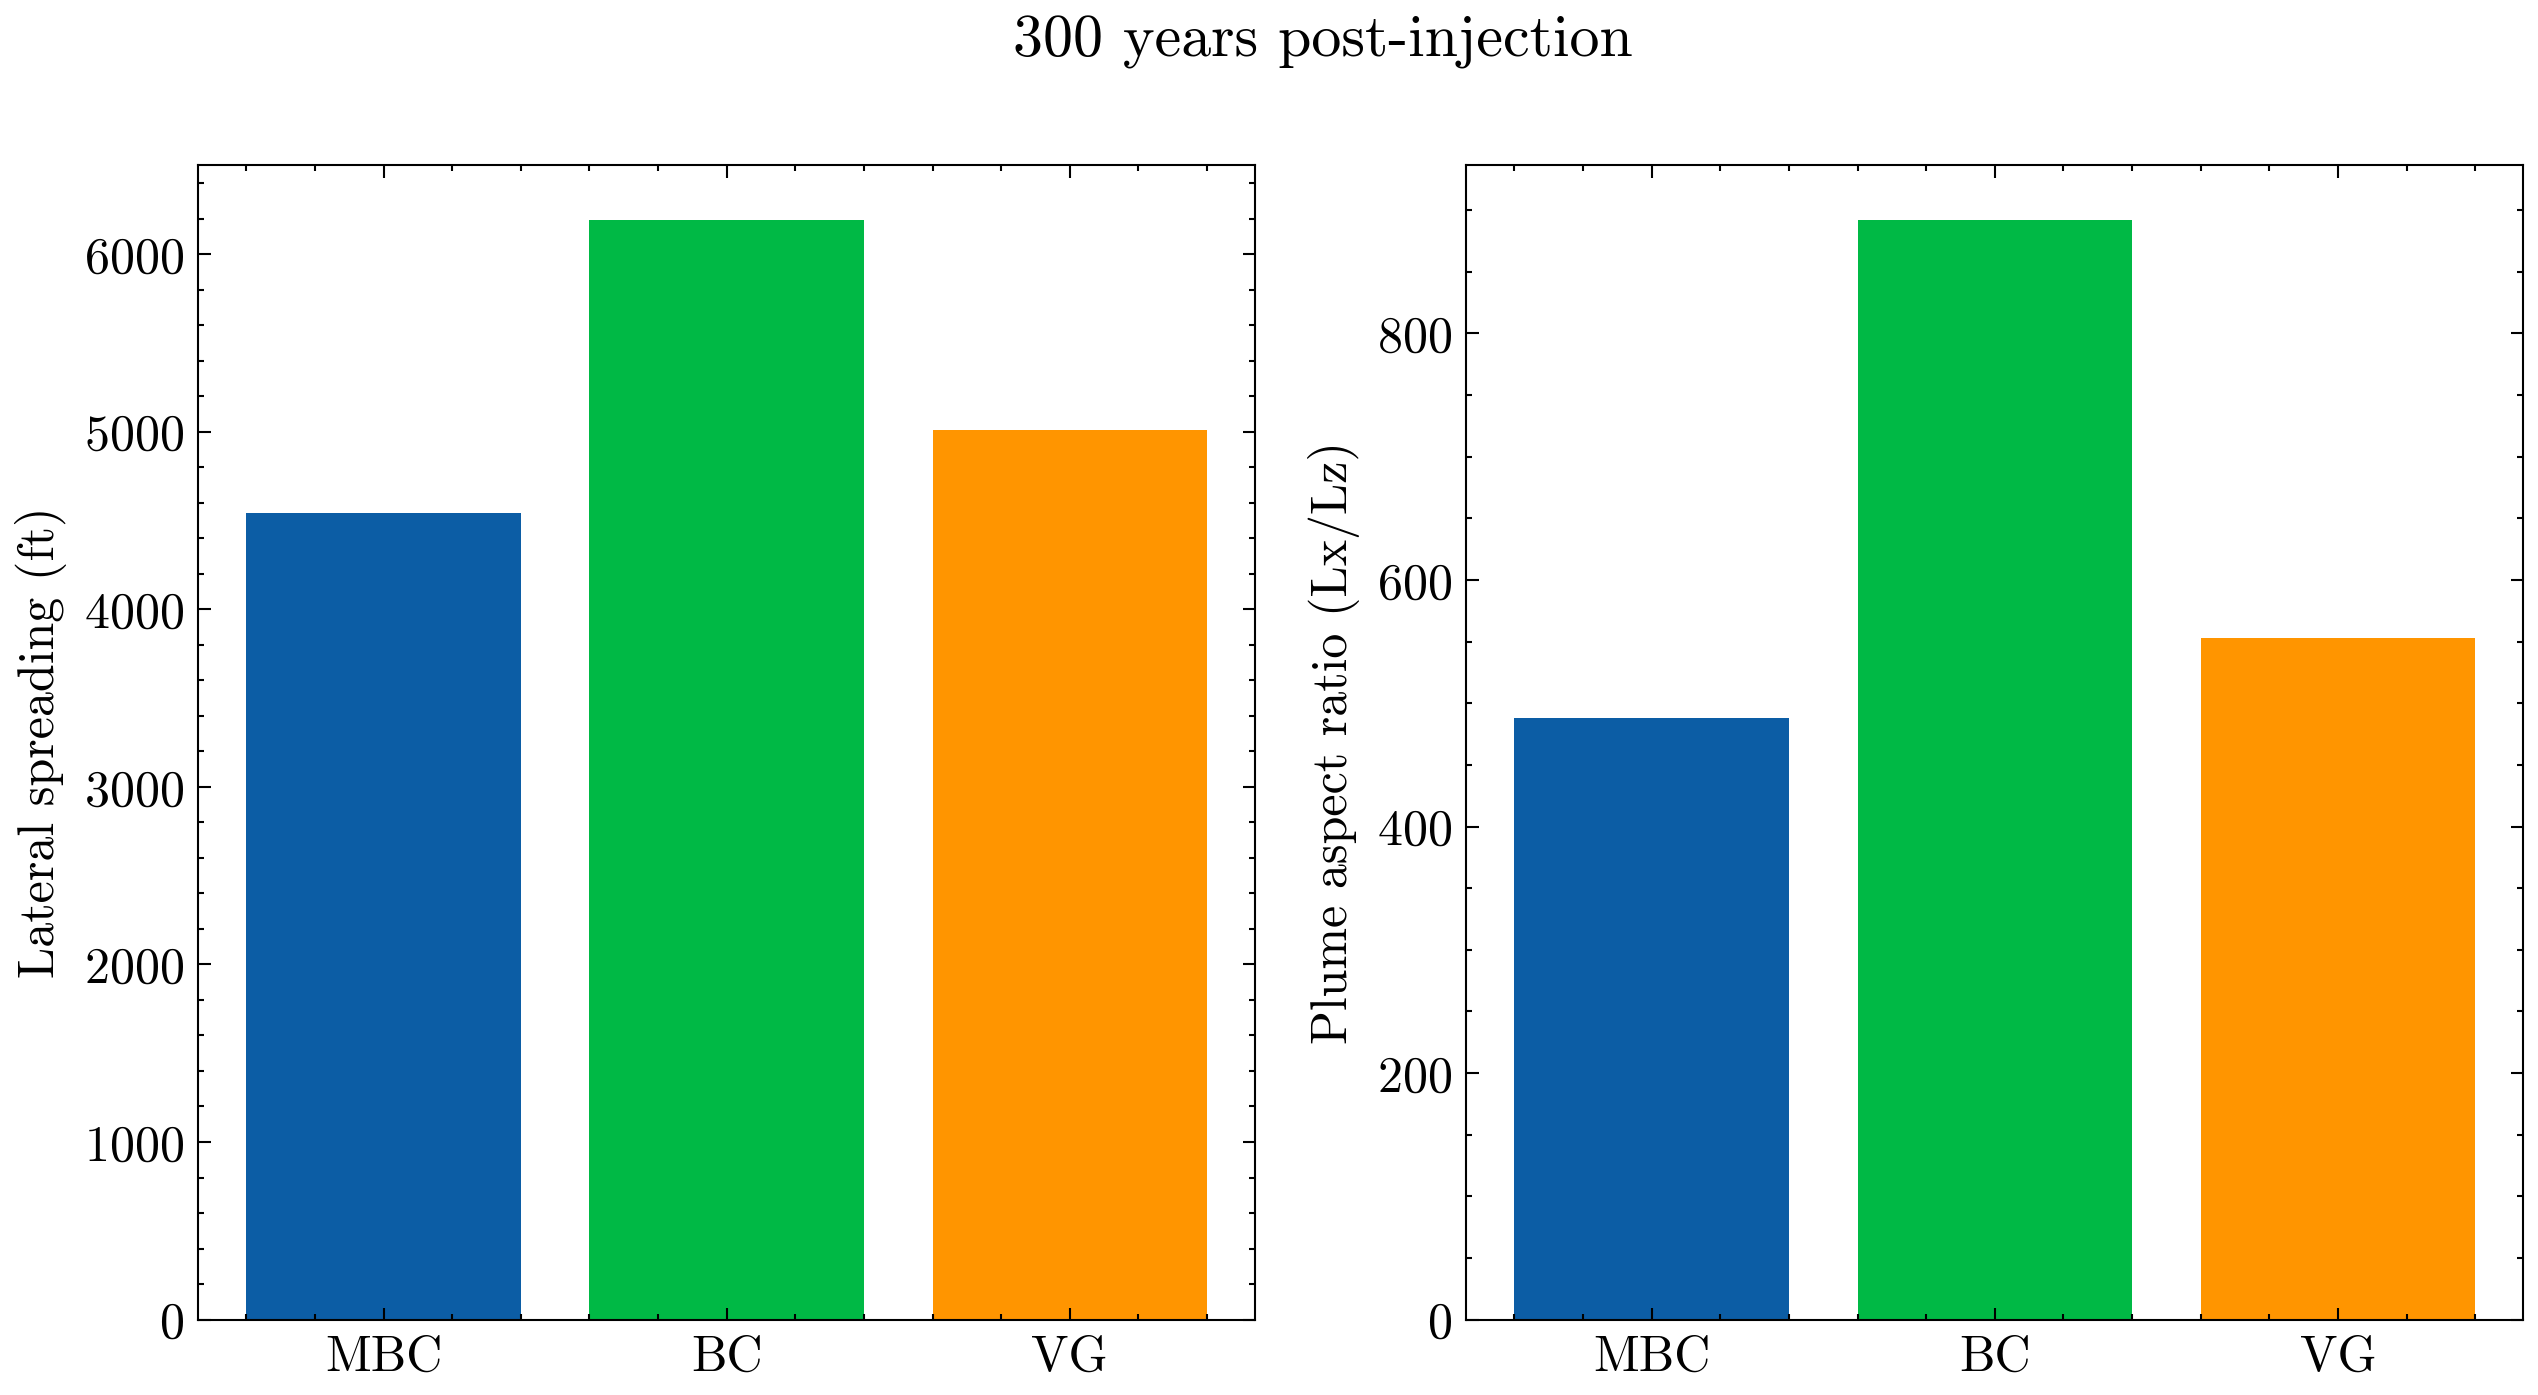

In [19]:
# Plot plume size and spreading
#plume_size = count[-1].values()
plume_spreading = np.array([mts_dict[sims[i]][3][-1] for i in range(size)])
plume_vertical_spreading = np.array([mts_dict[sims[i]][4][-1] for i in range(size)])
plume_aspect_ratio = plume_spreading/plume_vertical_spreading

fig, ax = plt.subplots(1,2,figsize=(10,5),dpi=300)
ax[1].bar(sims,plume_aspect_ratio,color=colors)
ax[1].set_ylabel('Plume aspect ratio (Lx/Lz)')
ax[0].bar(sims,2*np.sqrt(plume_spreading),color=colors)
ax[0].set_ylabel('Lateral spreading (ft)')
fig.suptitle('300 years post-injection')
plt.show()
